In [1]:
from collections import deque
from datetime import datetime
import numpy as np
import os, json, pickle,  gzip
# My packages and modules:
import utils
import argparse
import time 
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import my_neural_network as mnn
from agent import Agent
import gym
from train_agent import *

Reading data...
Preprocessing states. Shape: (13004, 96, 96, 3)
12995 12995


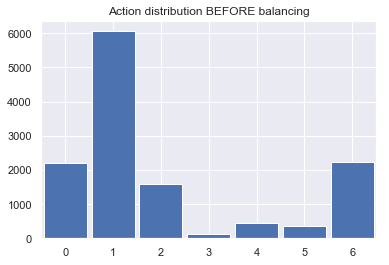

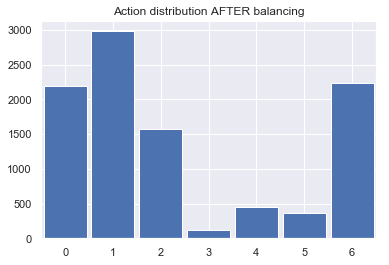

In [3]:
data_path = '../data/one/'


X, y = read_data(data_path)
X_pp, y_pp = preprocess_data(X, y, hist_len=10, shuffle=False)

# Plot action histogram. JUST FOR DEBUGGING.
plot_action_histogram(y_pp, 'Action distribution BEFORE balancing')   
# Balance samples. Gets hide of 50% of the most common action (accelerate)
X_pp, y_pp = utils.reduce_accelerate(X_pp, y_pp, 0.5)
# Plot action histogram. JUST FOR DEBUGGING.
plot_action_histogram(y_pp, 'Action distribution AFTER balancing')   
# Plot some random states before and after preprocessing. JUST FOR DEBUGGING. 
# Requires to run the above fucntion with hist_len=1, shuffle=False.
# plot_states(X_pp, X)
# Split data into training and validation:
X_train, y_train, X_valid, y_valid = split_data(X_pp, y_pp, frac=.1)

(7376, 96, 96, 10)


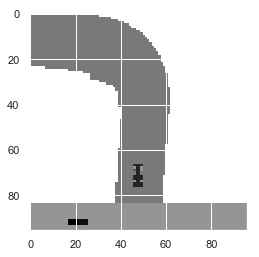

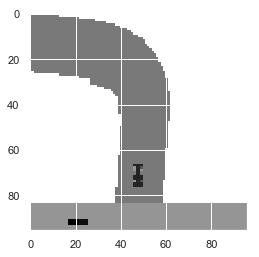

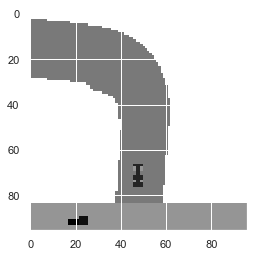

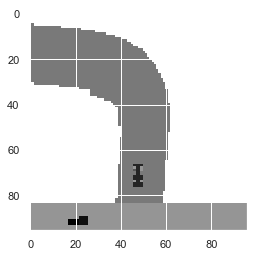

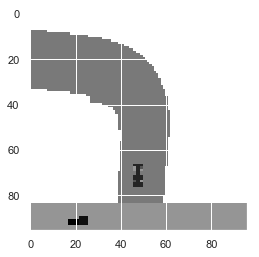

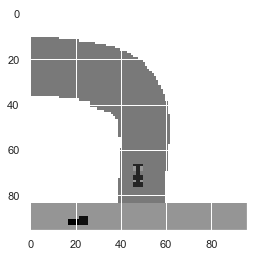

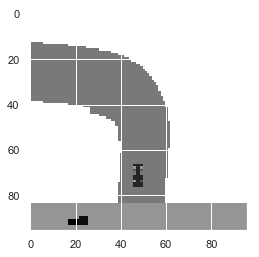

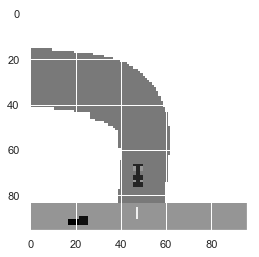

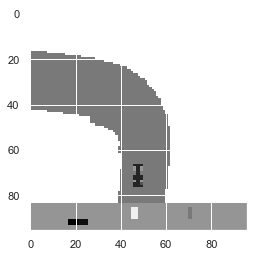

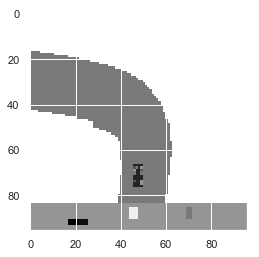

In [18]:
print(X_pp.shape)
for i in range(10):
    plt.imshow(X_pp[1000,:,:,i], cmap='gray')
    plt.show()

(9168, 96, 96, 3)


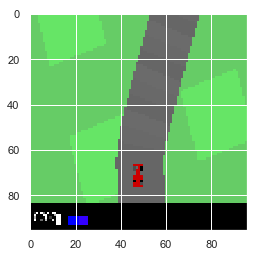

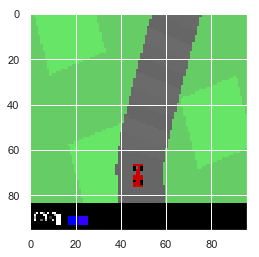

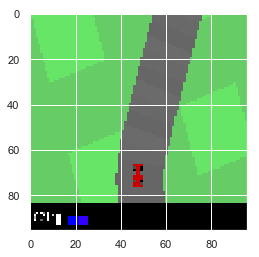

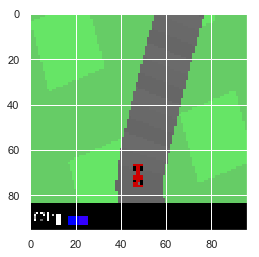

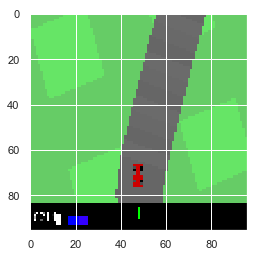

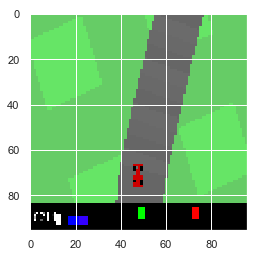

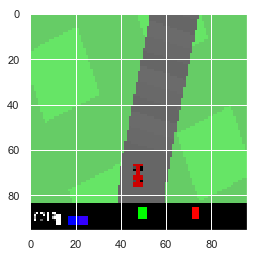

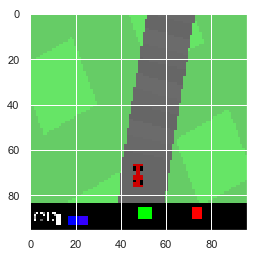

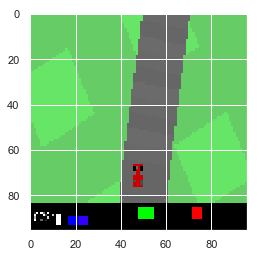

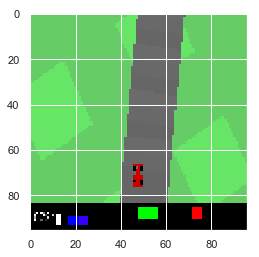

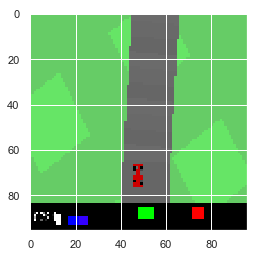

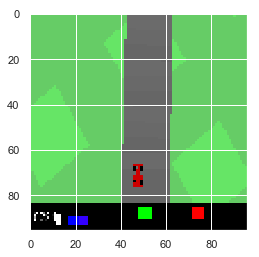

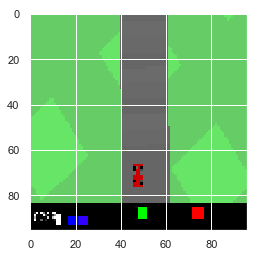

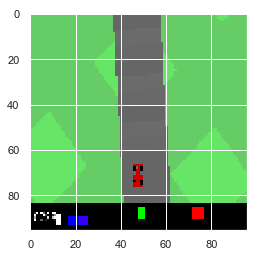

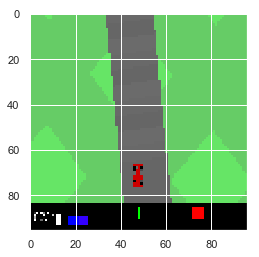

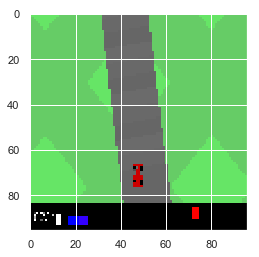

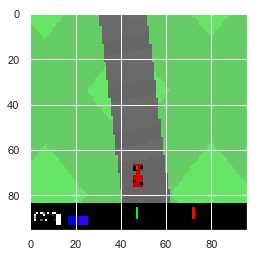

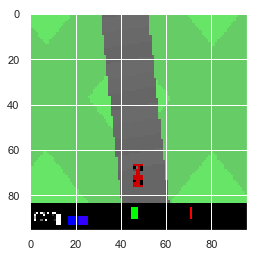

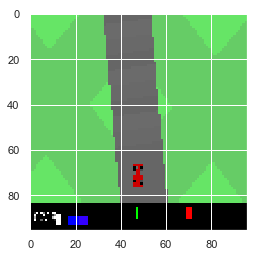

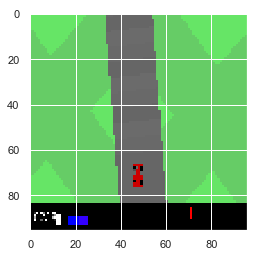

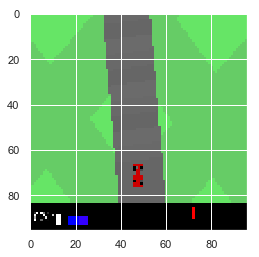

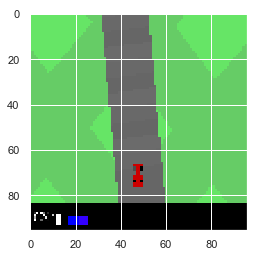

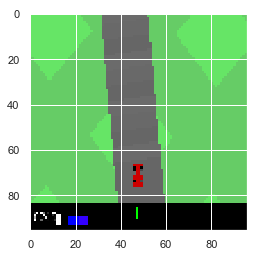

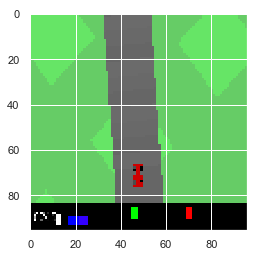

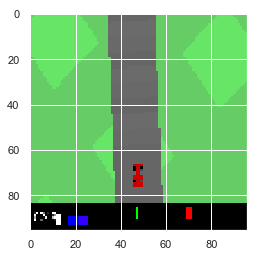

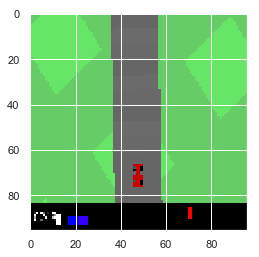

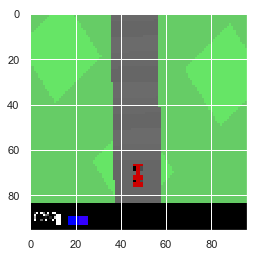

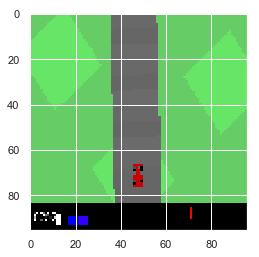

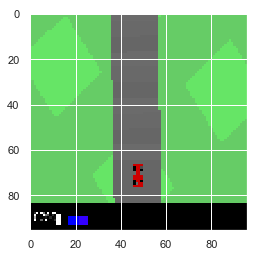

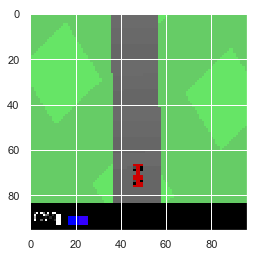

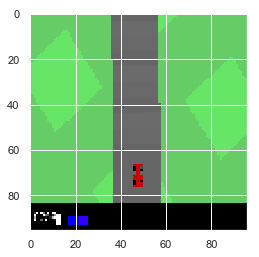

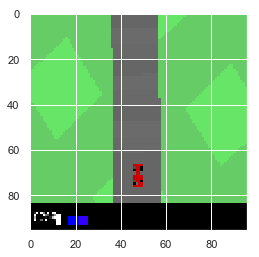

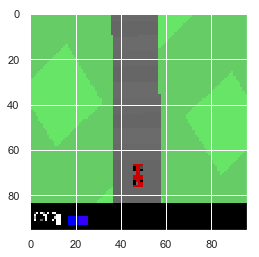

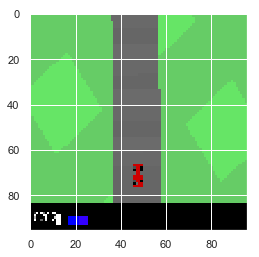

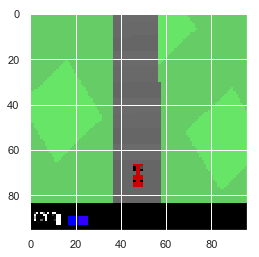

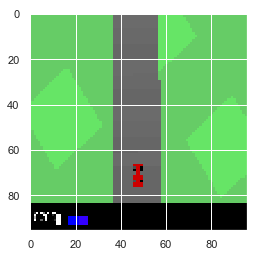

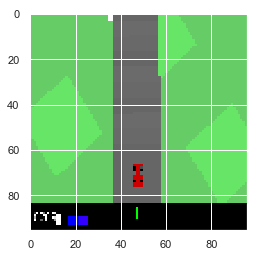

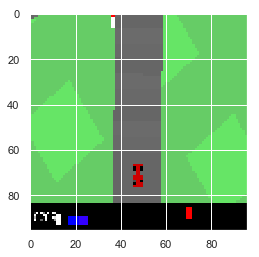

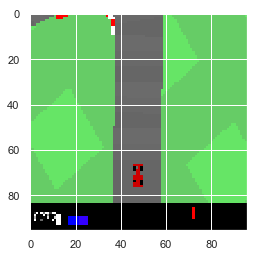

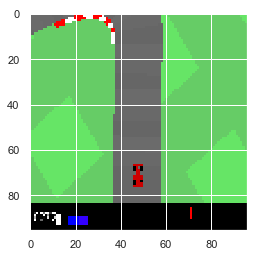

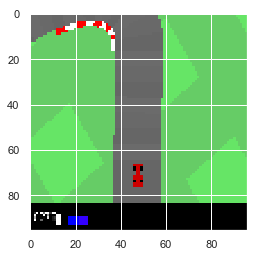

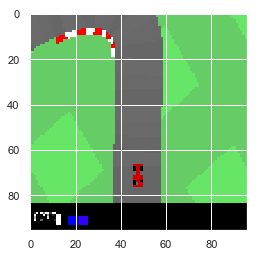

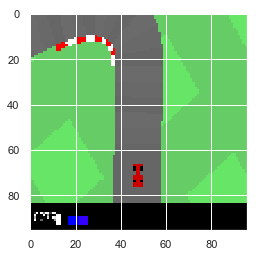

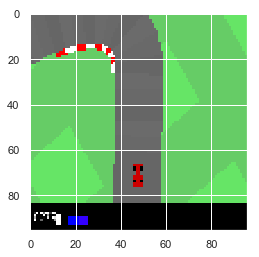

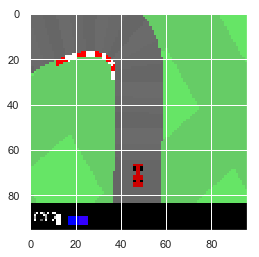

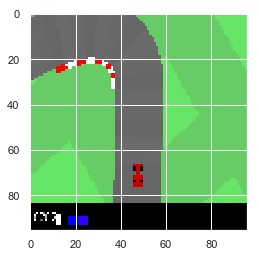

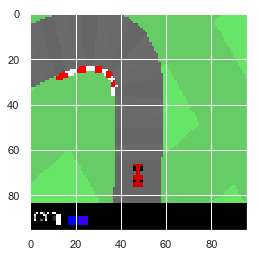

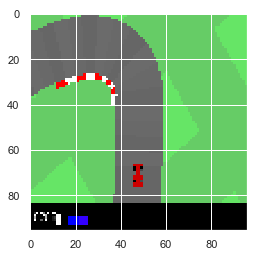

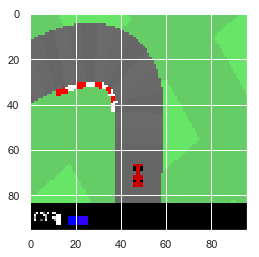

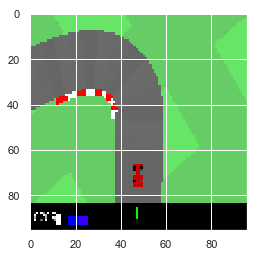

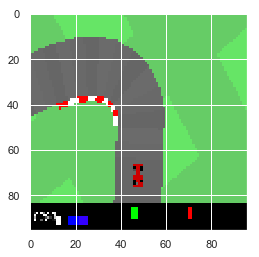

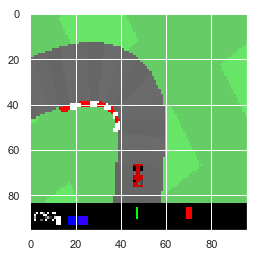

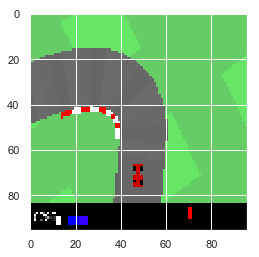

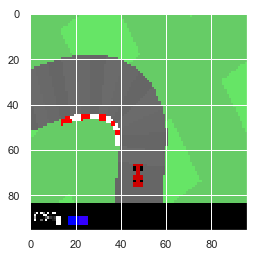

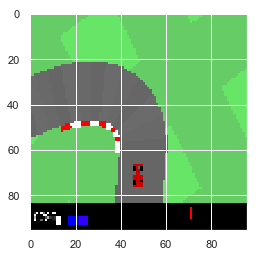

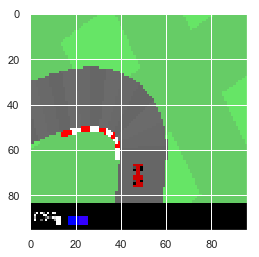

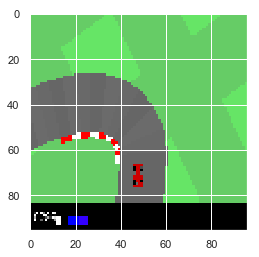

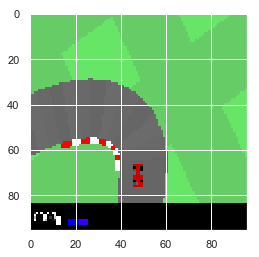

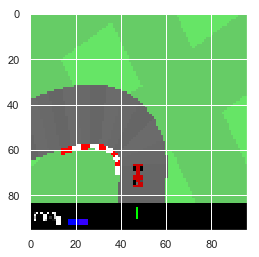

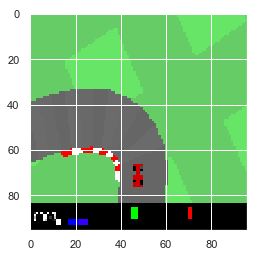

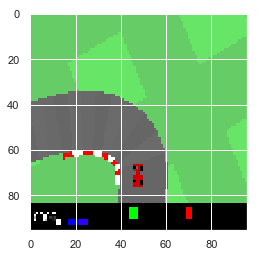

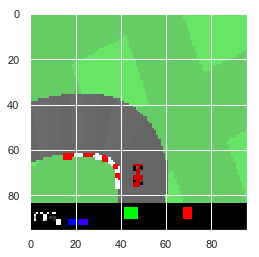

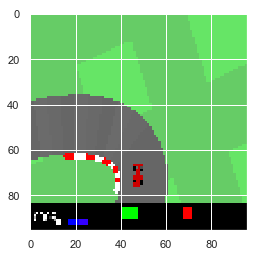

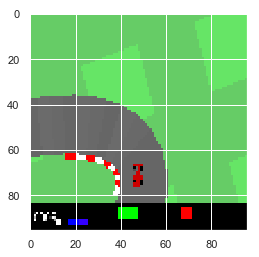

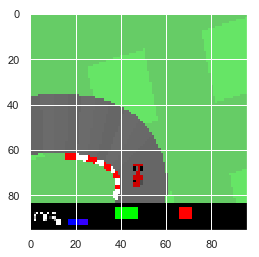

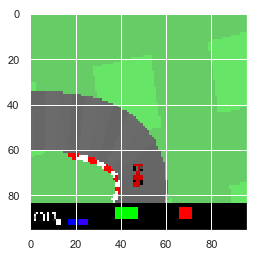

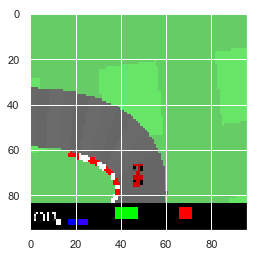

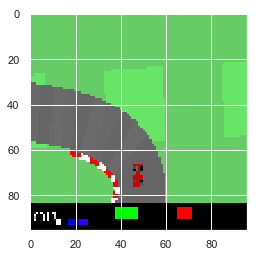

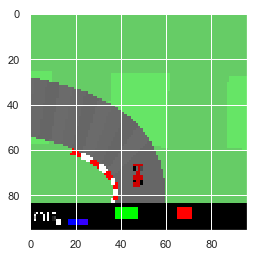

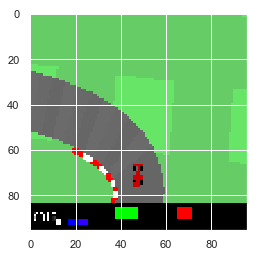

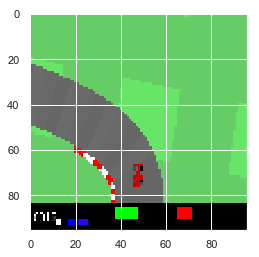

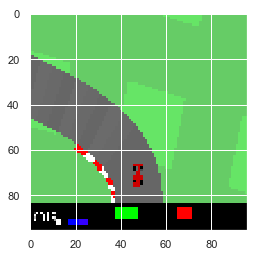

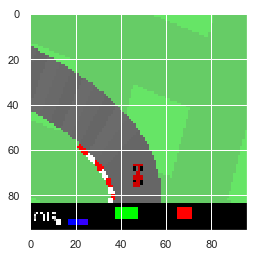

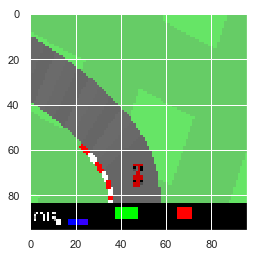

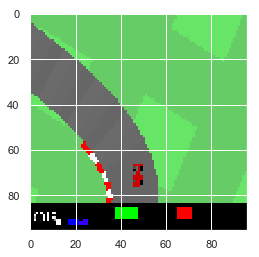

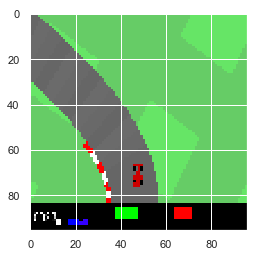

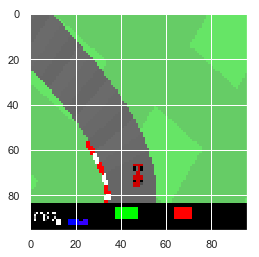

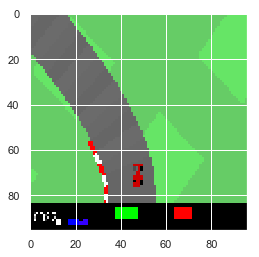

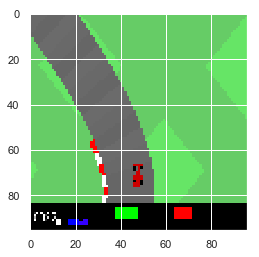

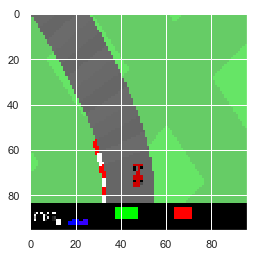

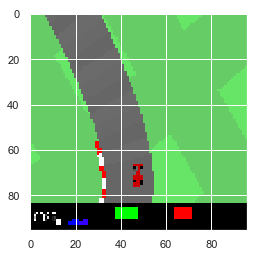

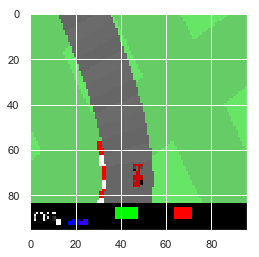

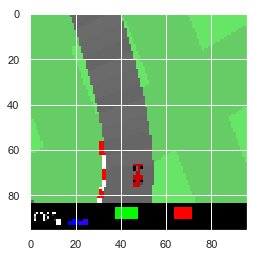

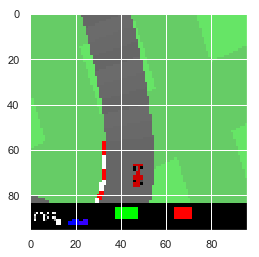

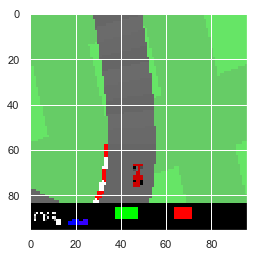

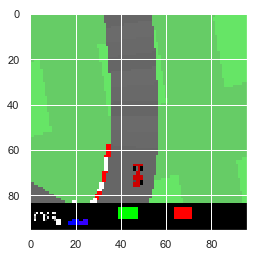

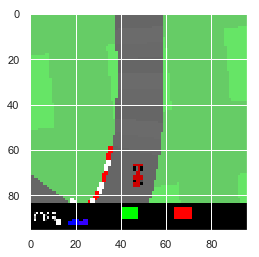

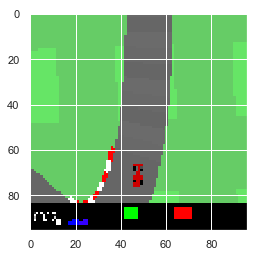

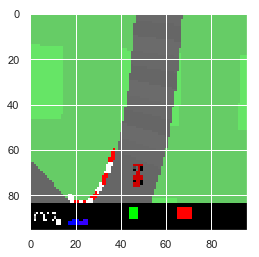

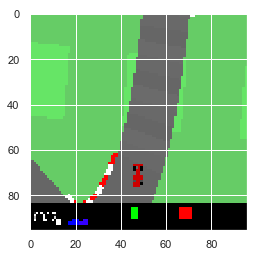

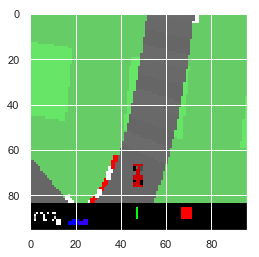

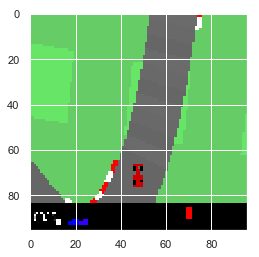

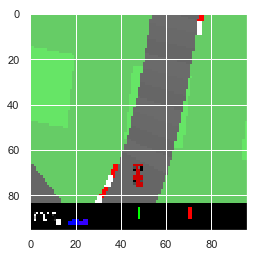

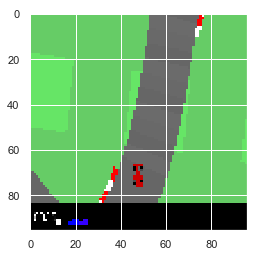

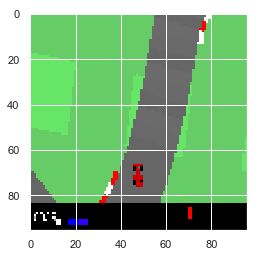

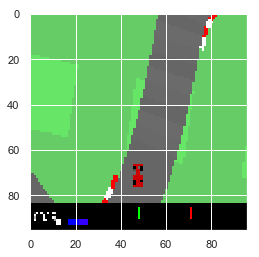

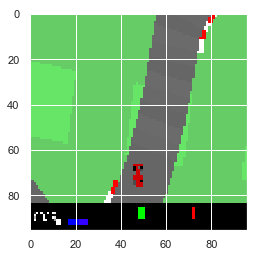

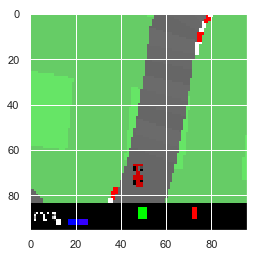

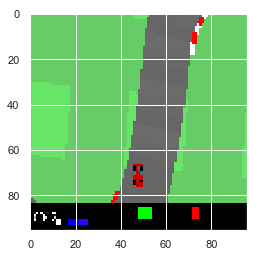

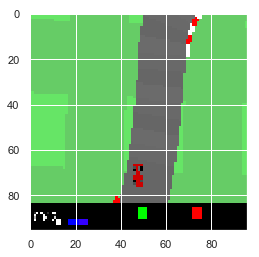

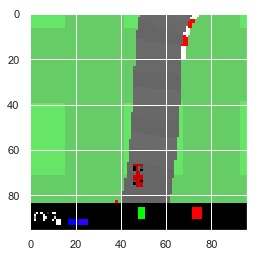

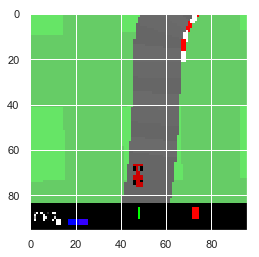

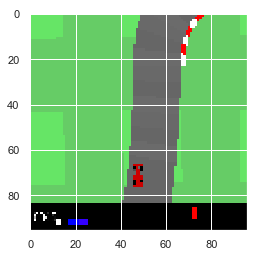

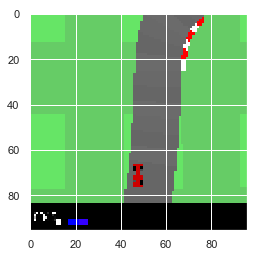

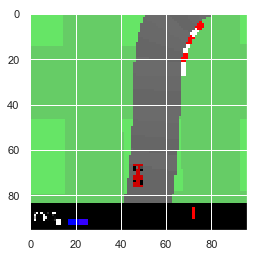

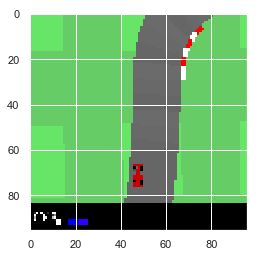

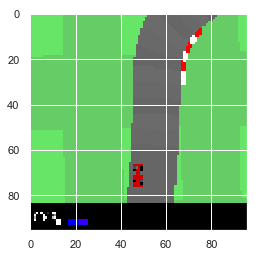

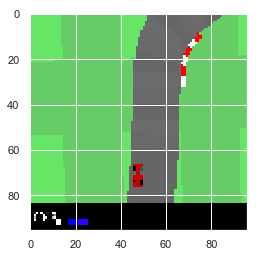

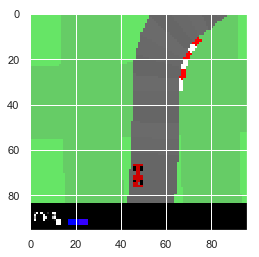

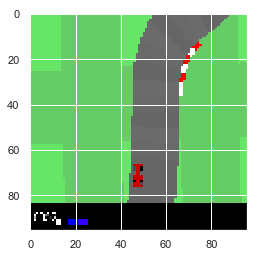

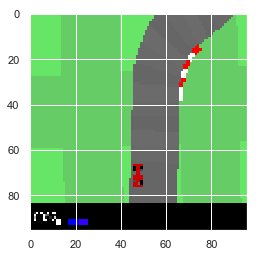

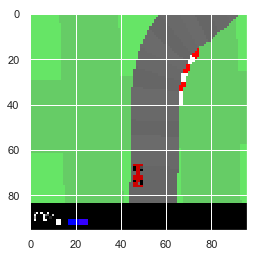

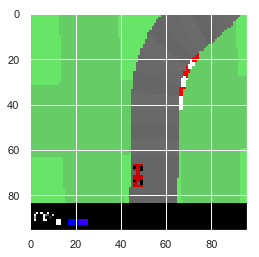

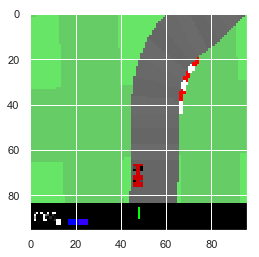

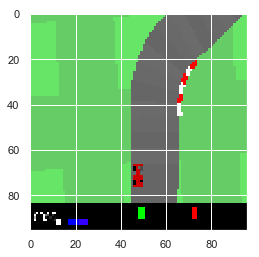

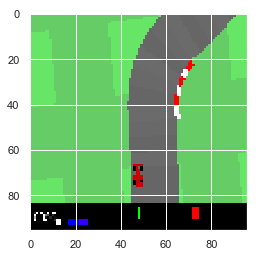

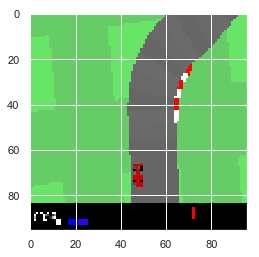

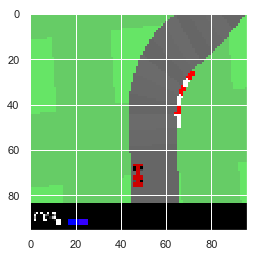

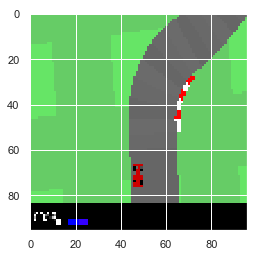

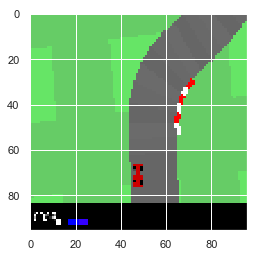

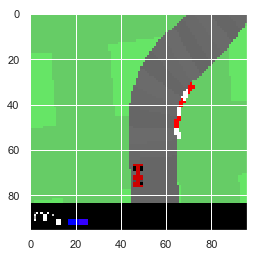

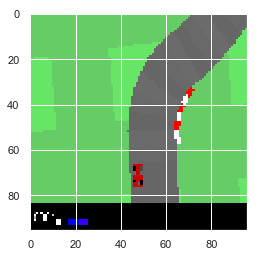

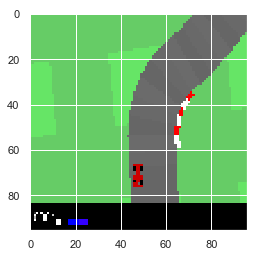

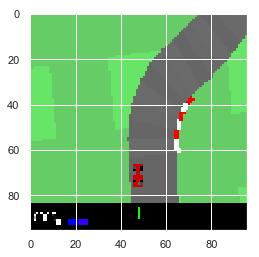

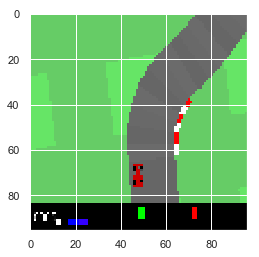

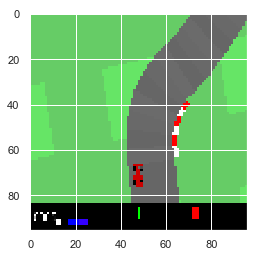

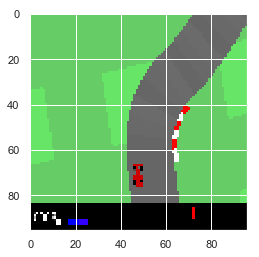

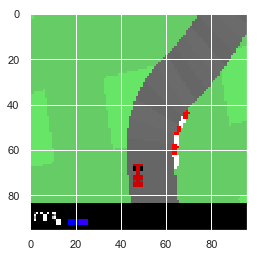

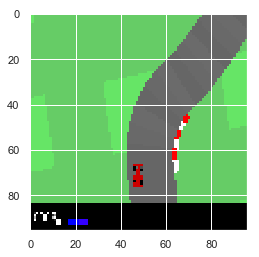

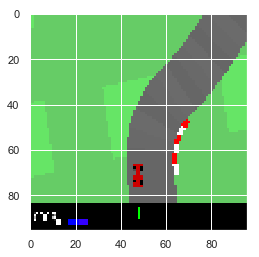

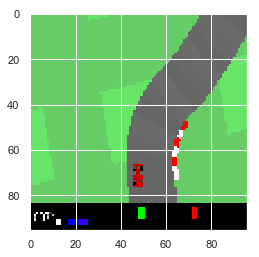

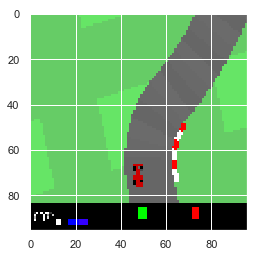

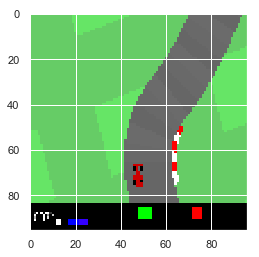

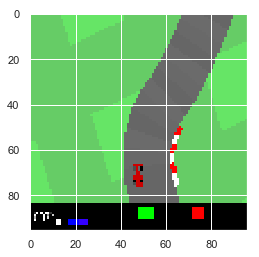

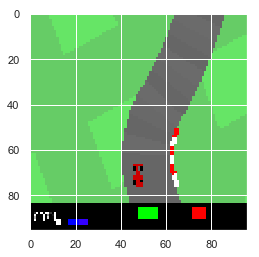

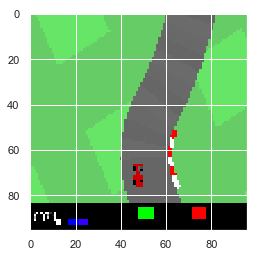

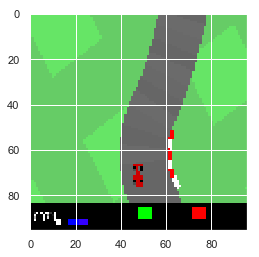

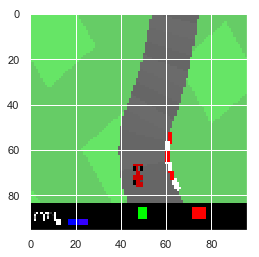

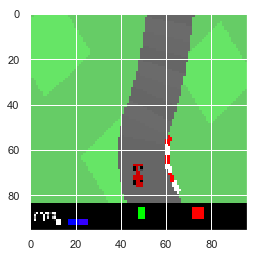

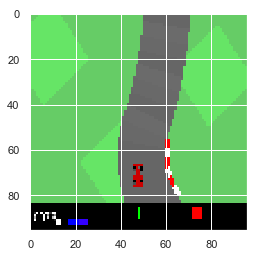

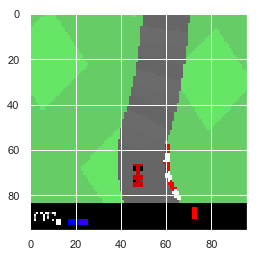

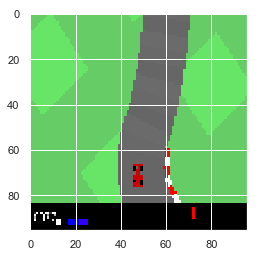

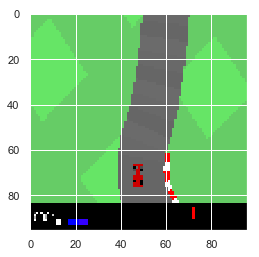

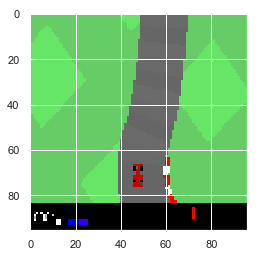

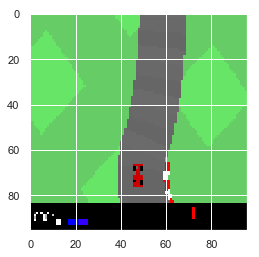

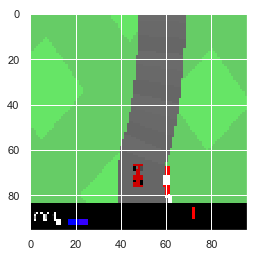

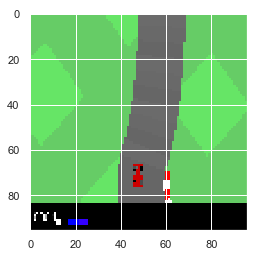

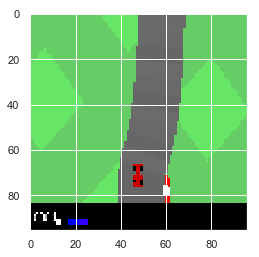

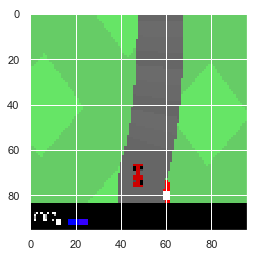

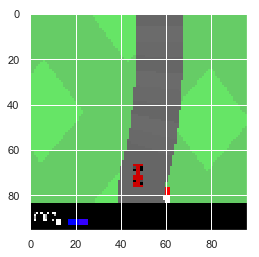

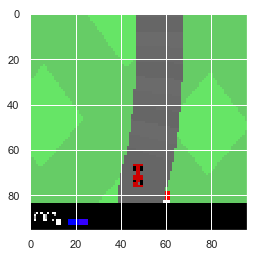

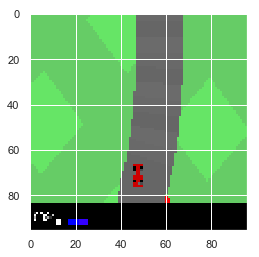

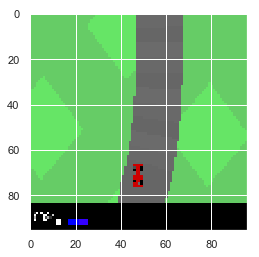

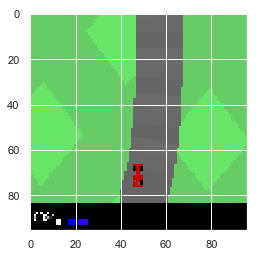

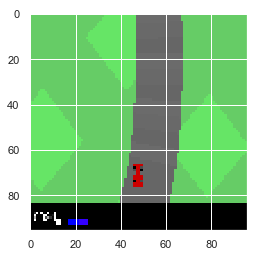

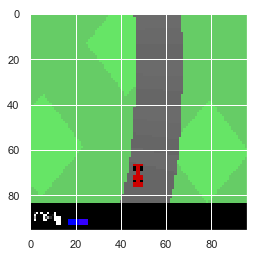

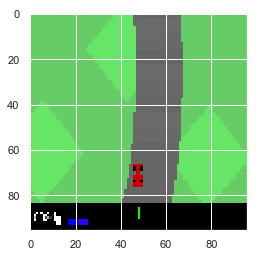

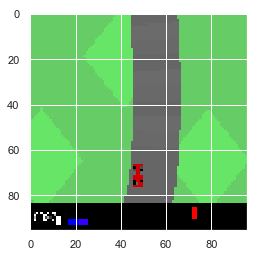

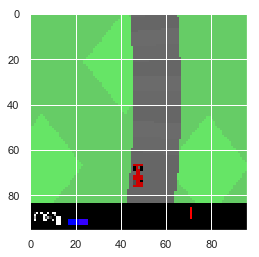

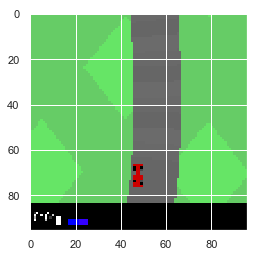

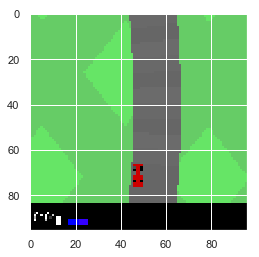

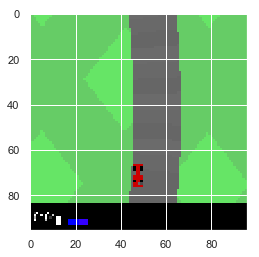

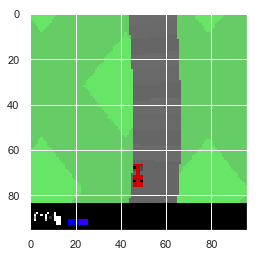

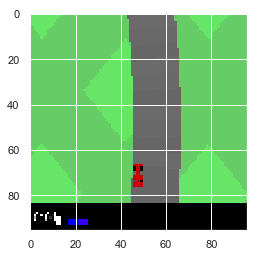

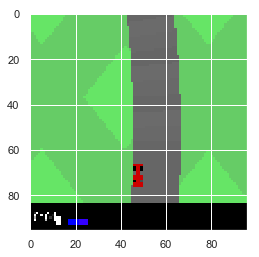

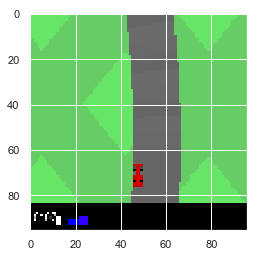

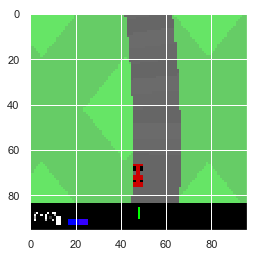

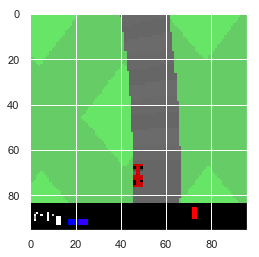

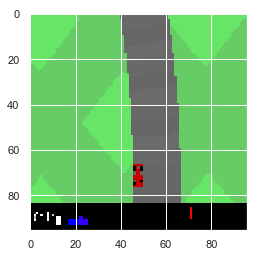

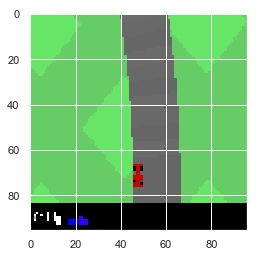

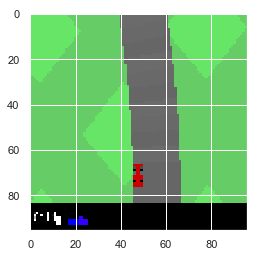

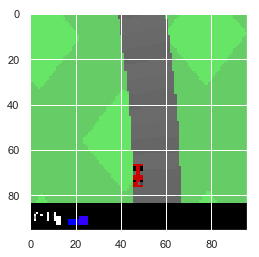

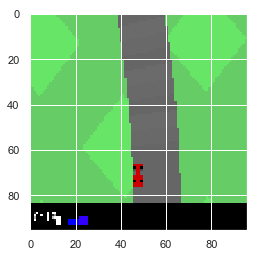

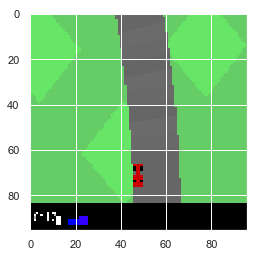

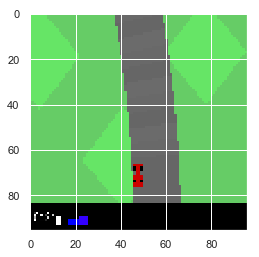

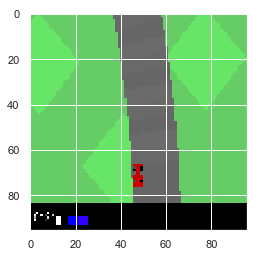

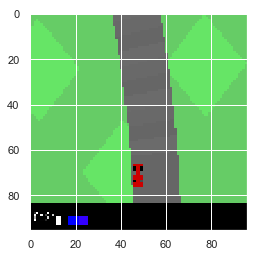

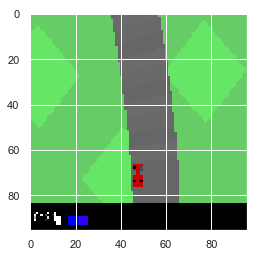

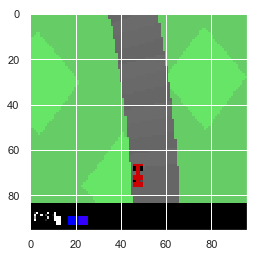

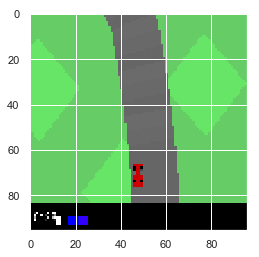

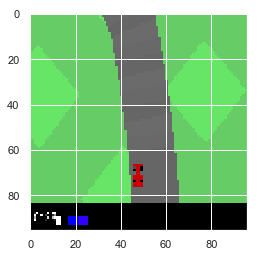

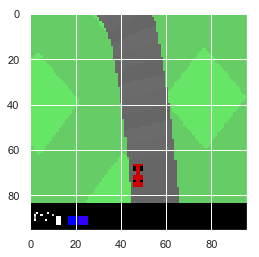

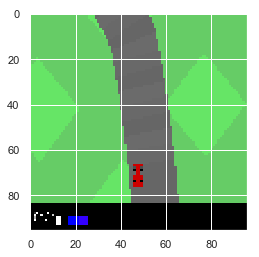

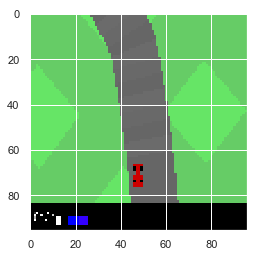

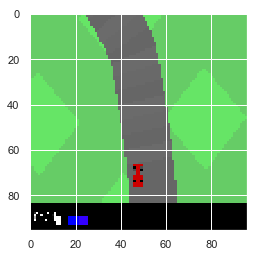

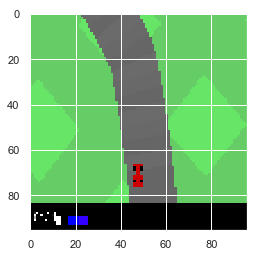

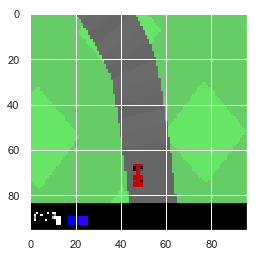

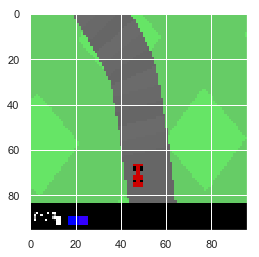

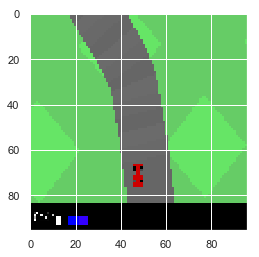

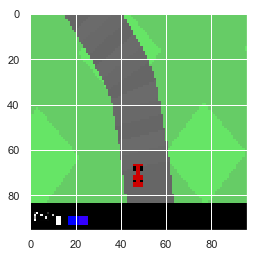

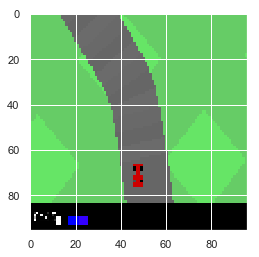

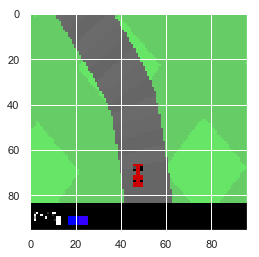

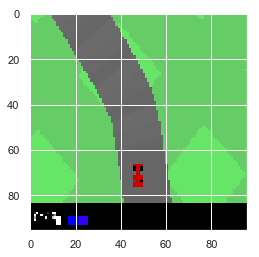

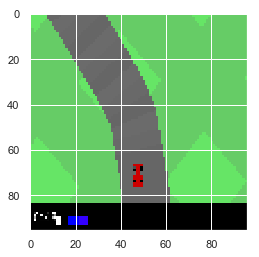

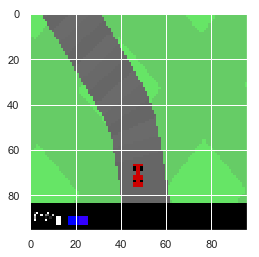

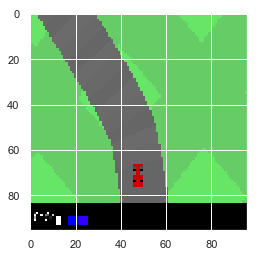

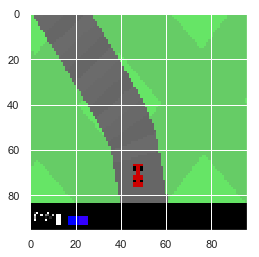

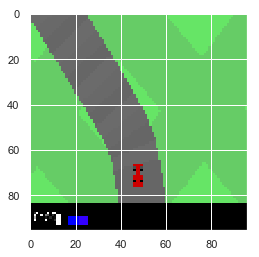

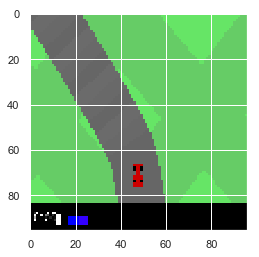

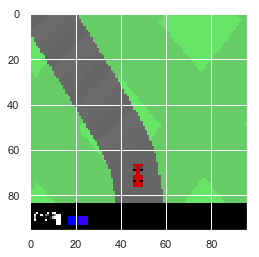

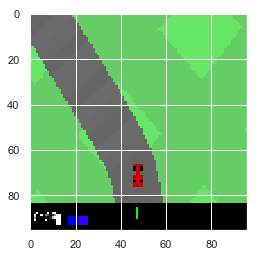

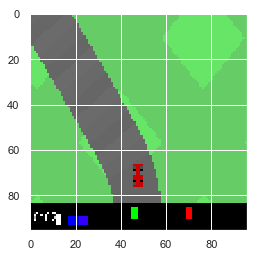

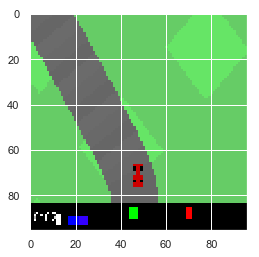

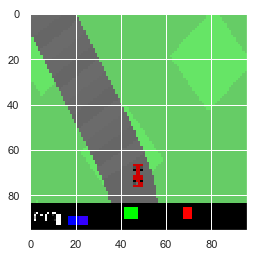

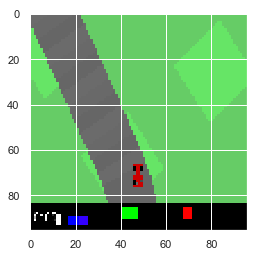

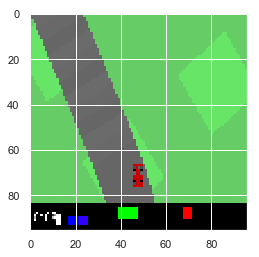

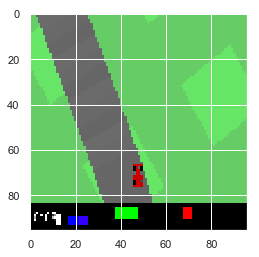

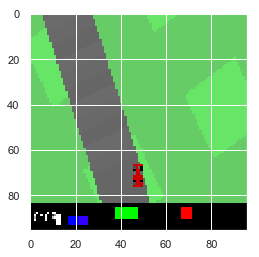

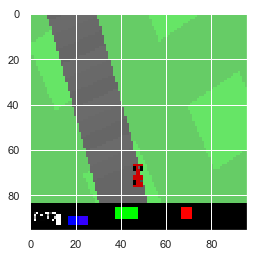

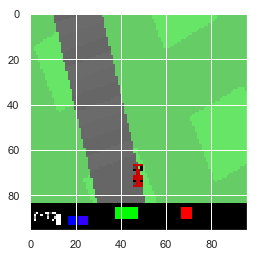

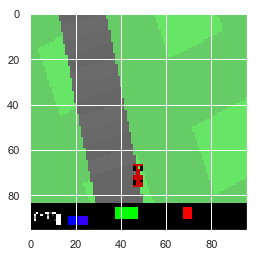

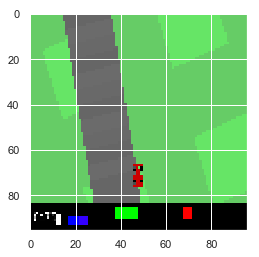

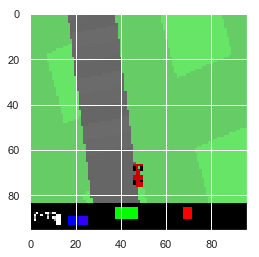

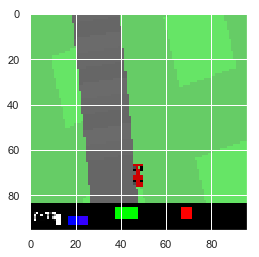

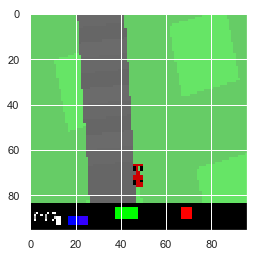

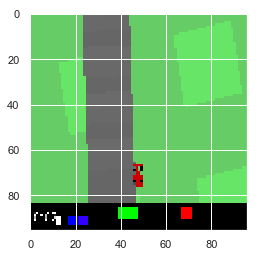

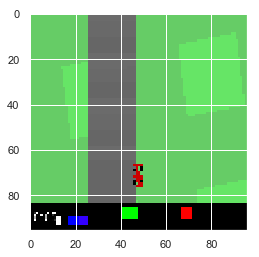

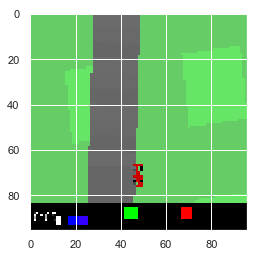

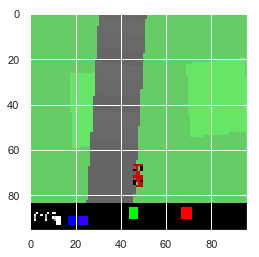

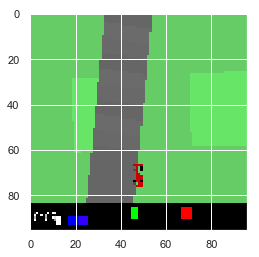

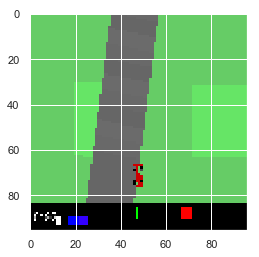

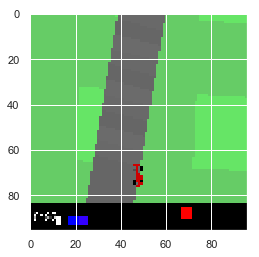

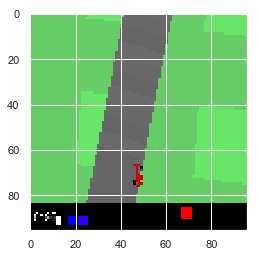

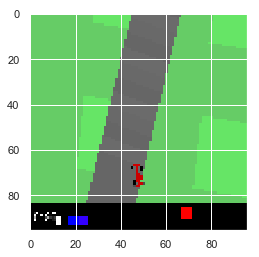

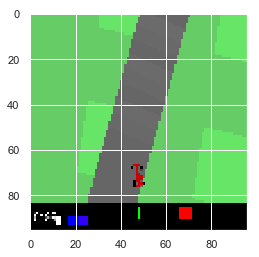

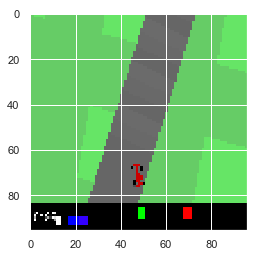

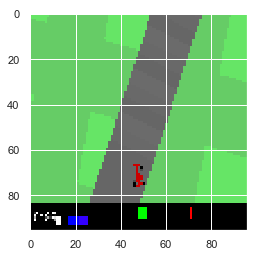

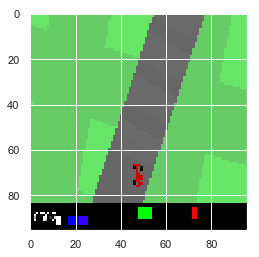

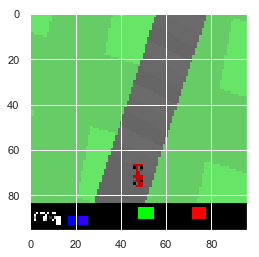

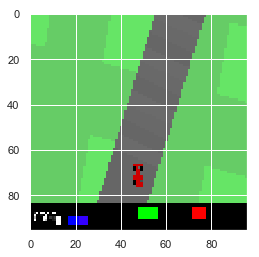

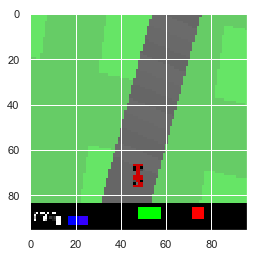

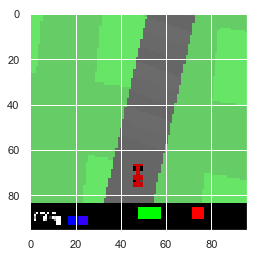

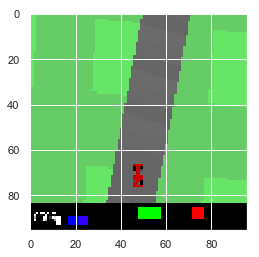

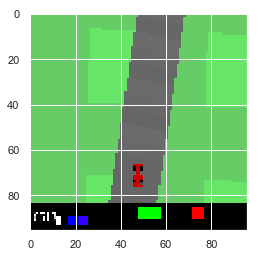

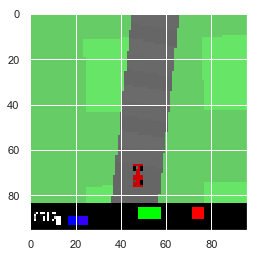

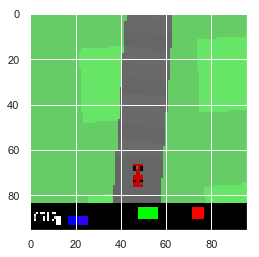

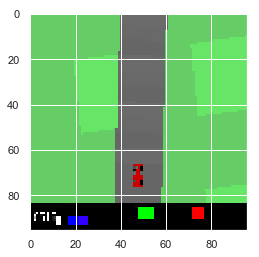

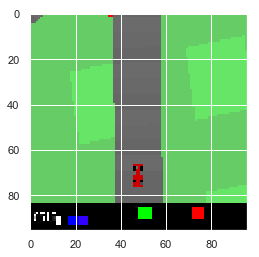

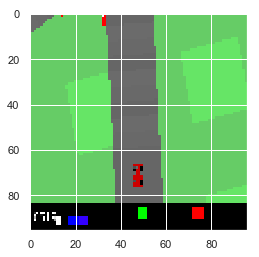

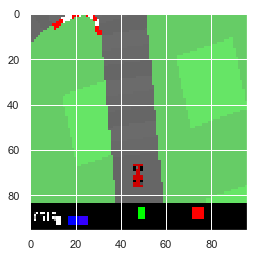

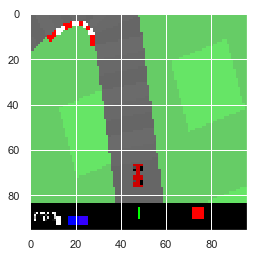

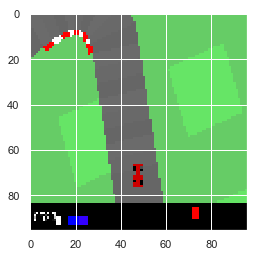

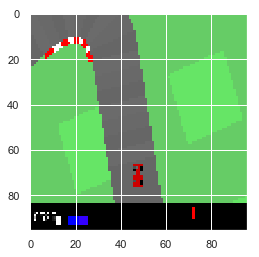

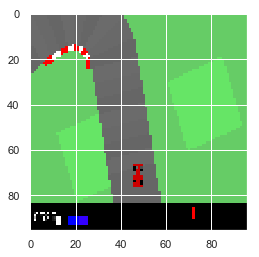

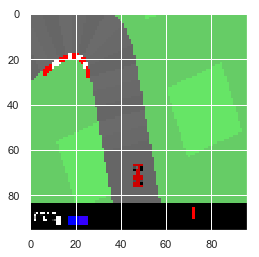

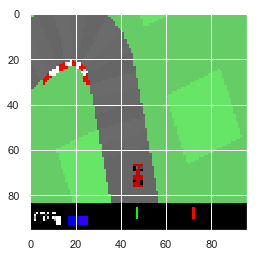

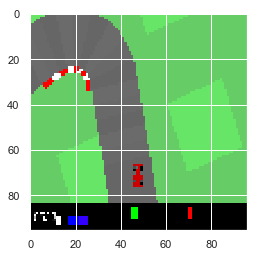

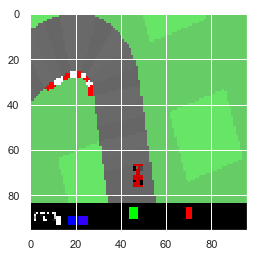

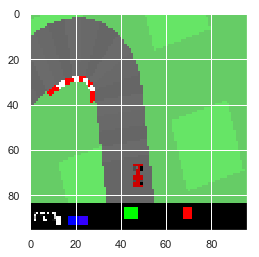

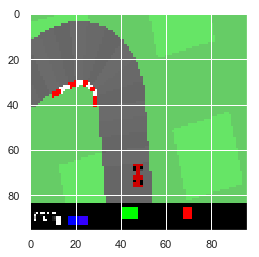

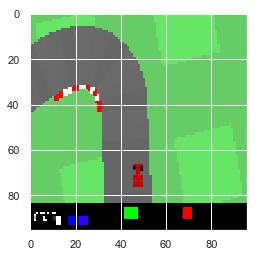

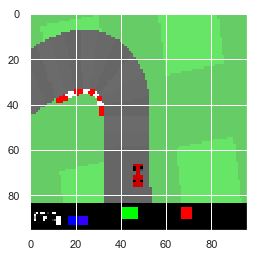

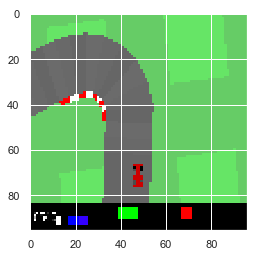

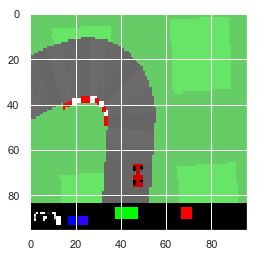

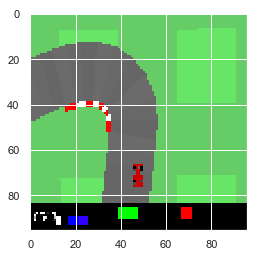

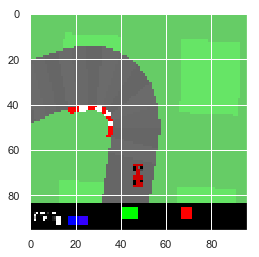

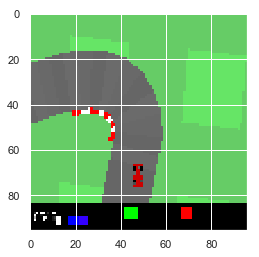

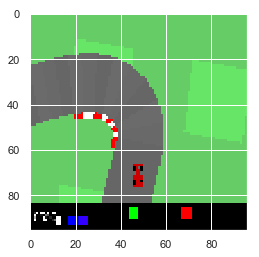

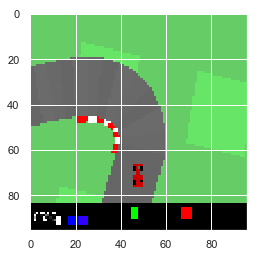

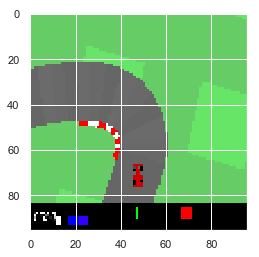

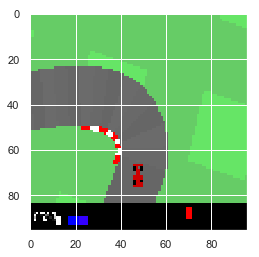

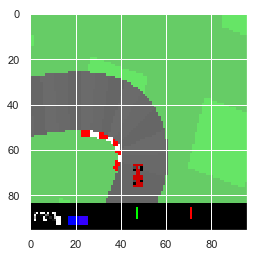

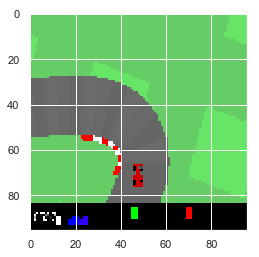

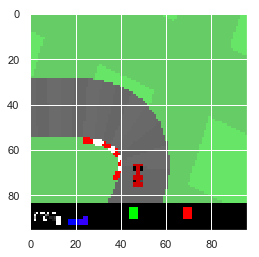

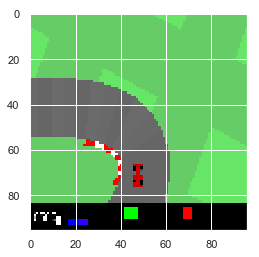

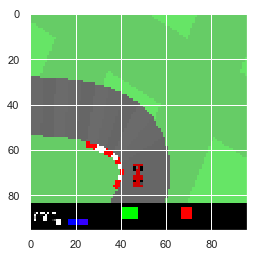

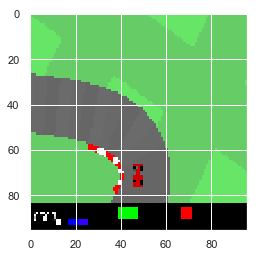

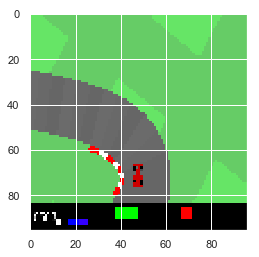

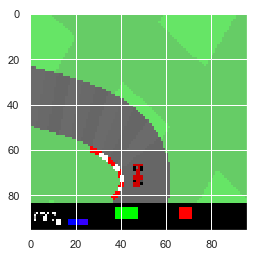

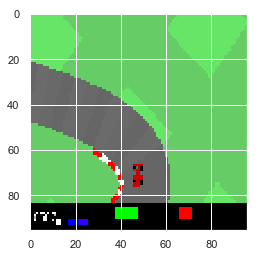

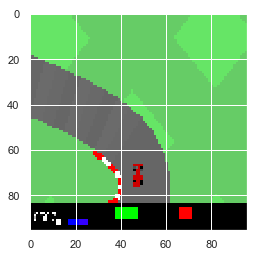

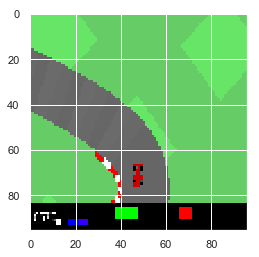

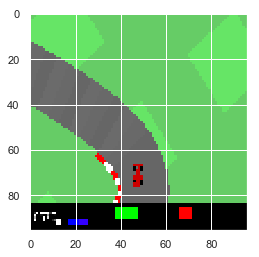

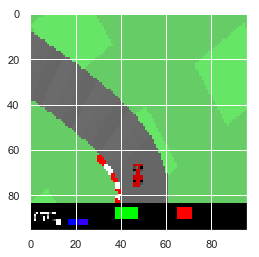

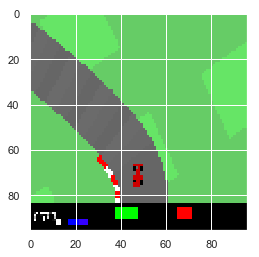

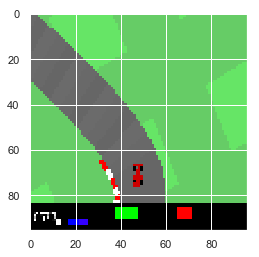

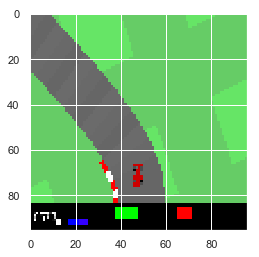

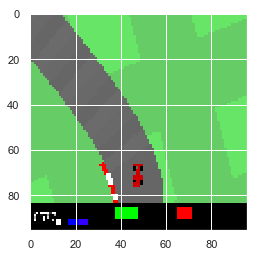

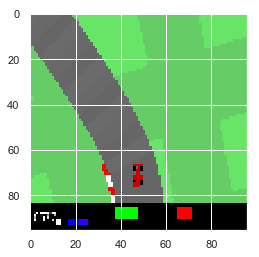

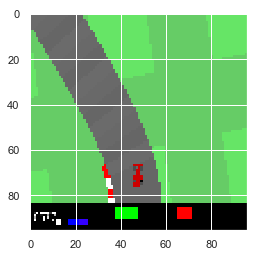

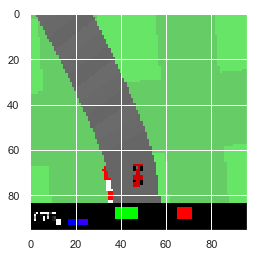

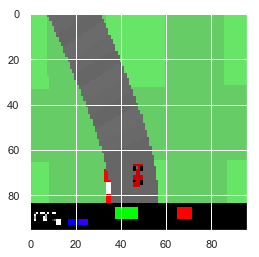

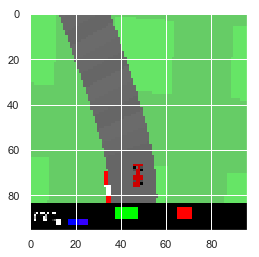

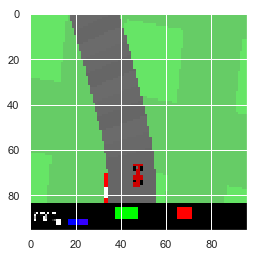

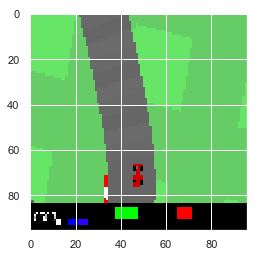

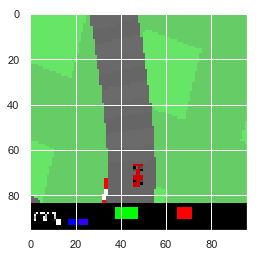

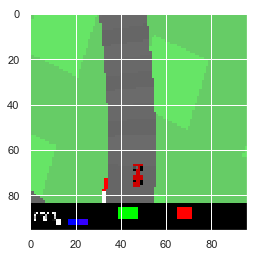

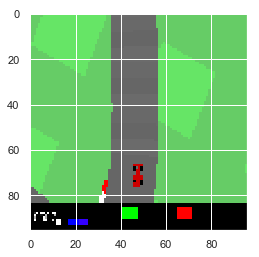

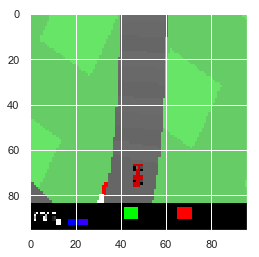

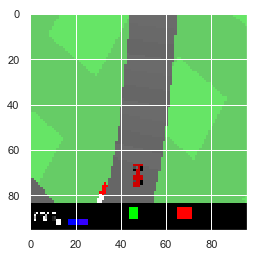

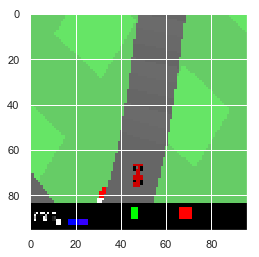

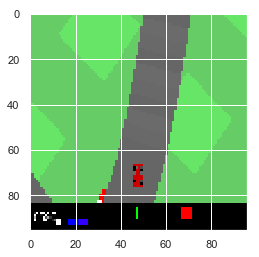

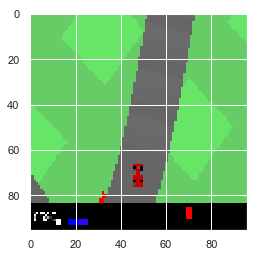

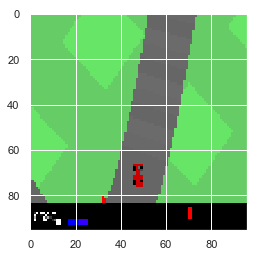

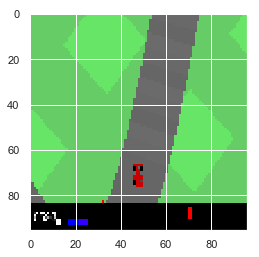

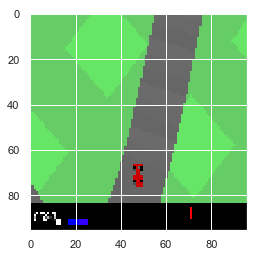

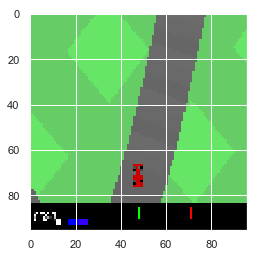

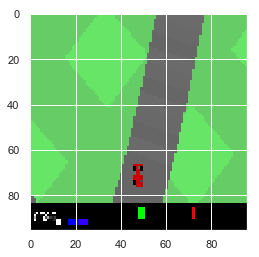

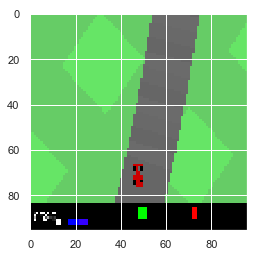

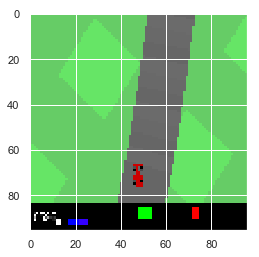

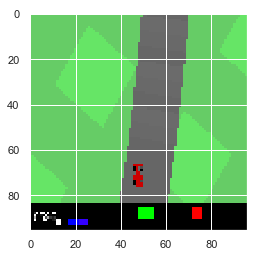

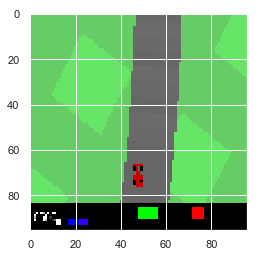

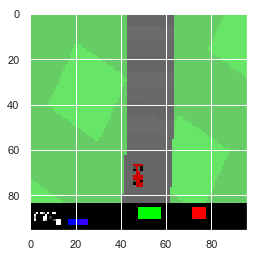

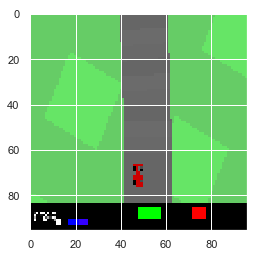

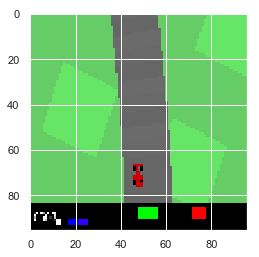

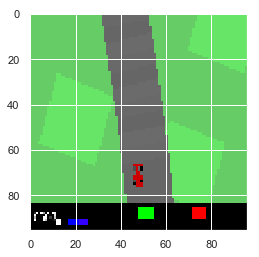

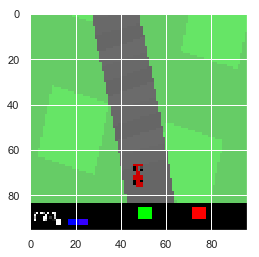

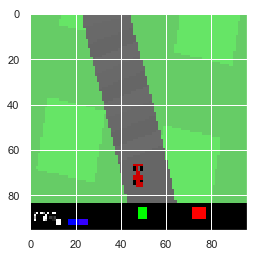

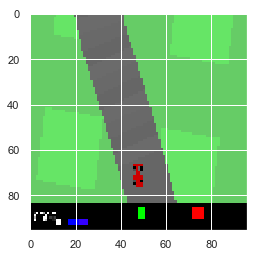

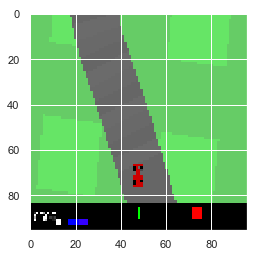

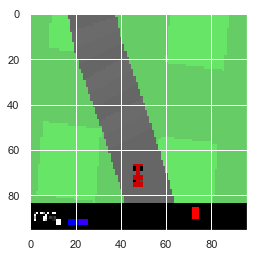

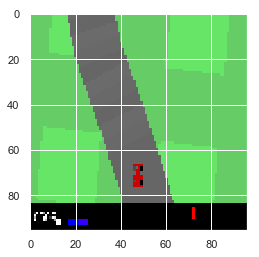

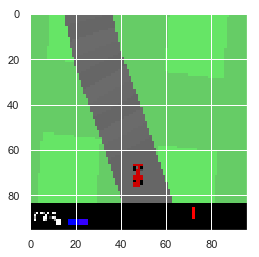

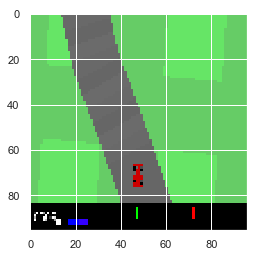

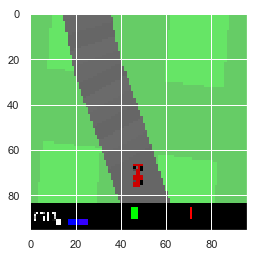

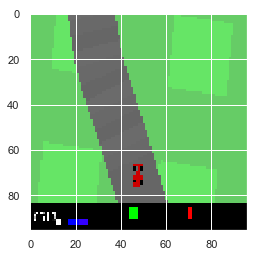

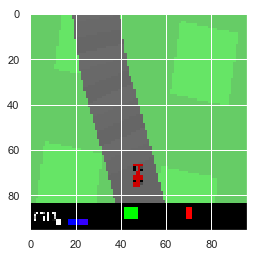

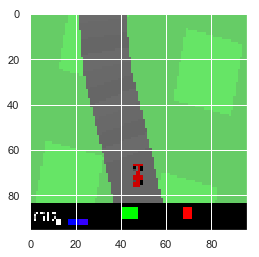

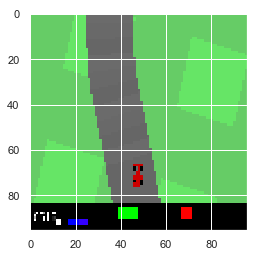

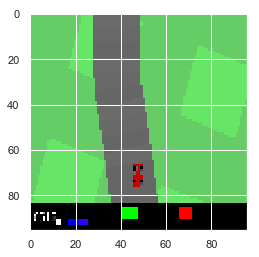

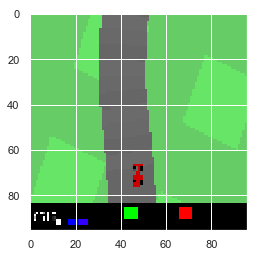

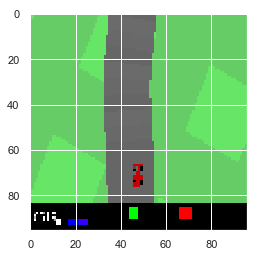

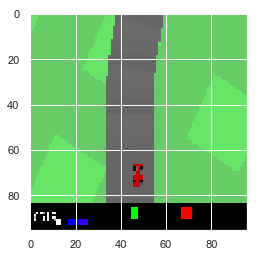

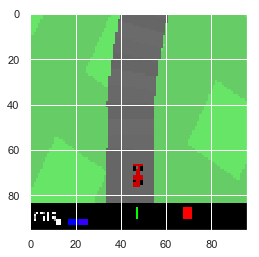

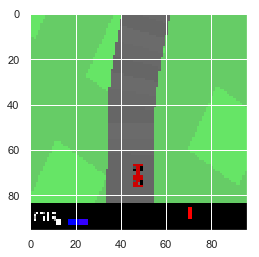

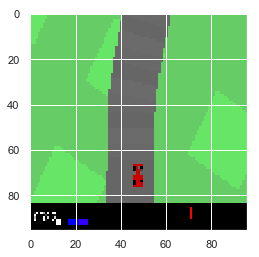

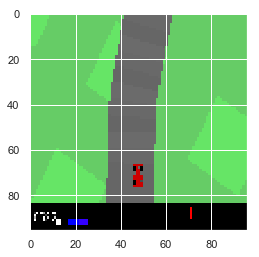

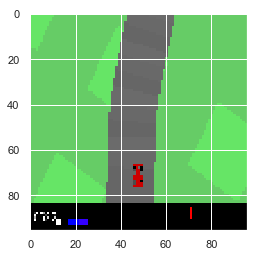

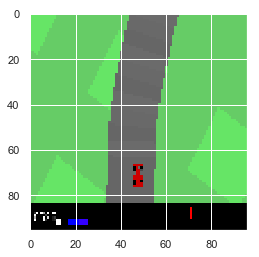

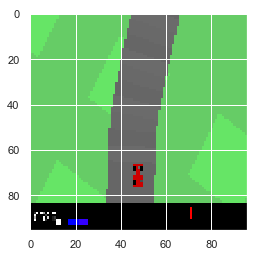

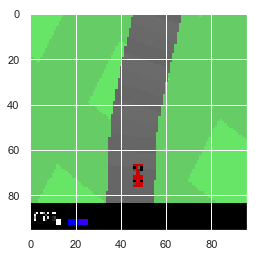

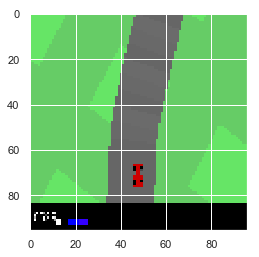

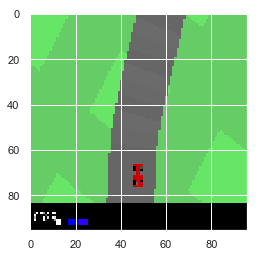

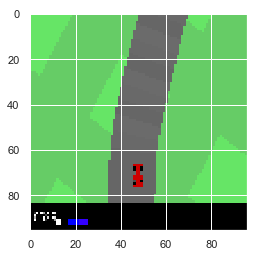

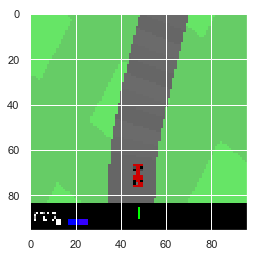

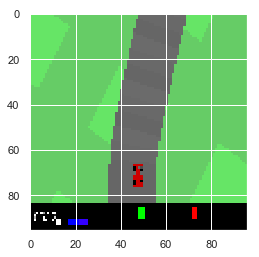

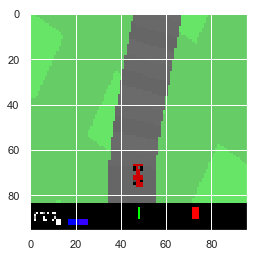

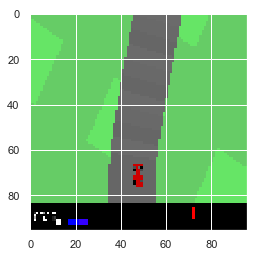

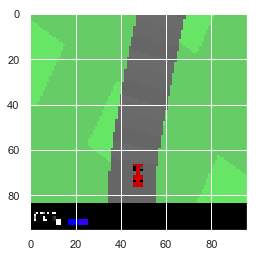

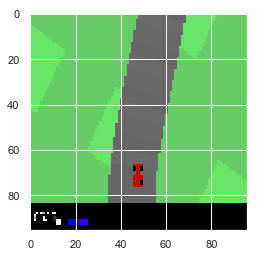

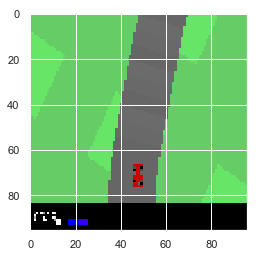

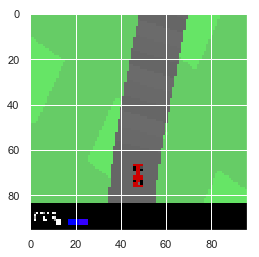

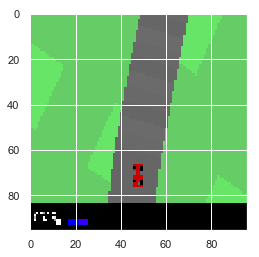

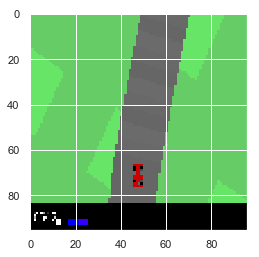

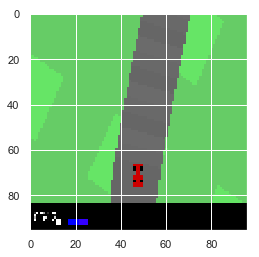

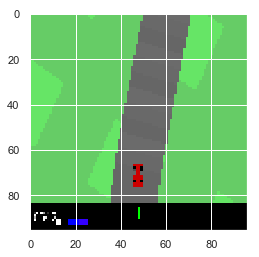

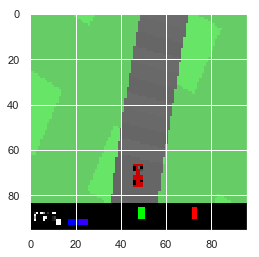

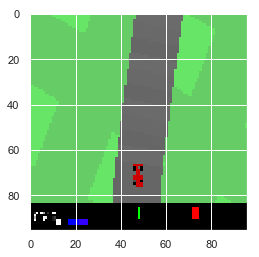

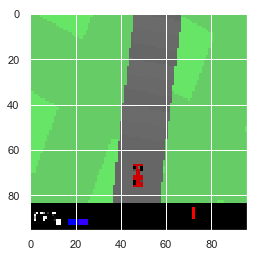

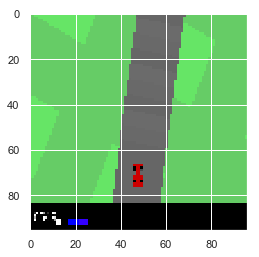

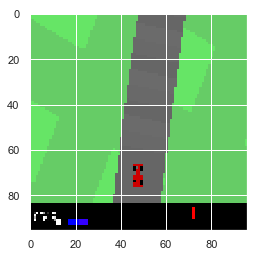

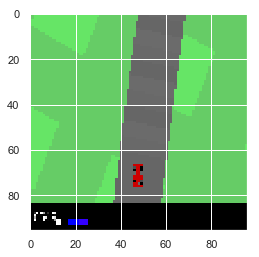

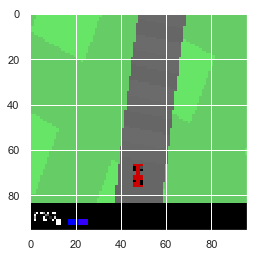

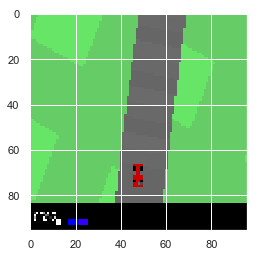

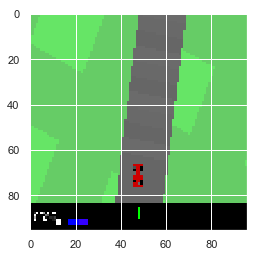

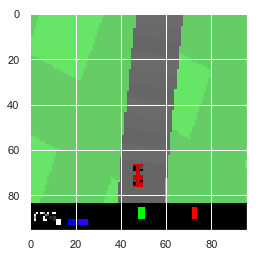

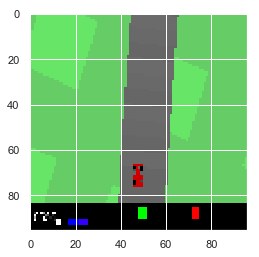

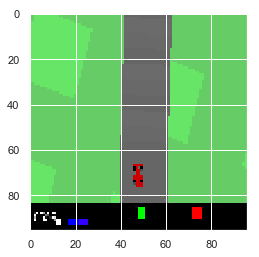

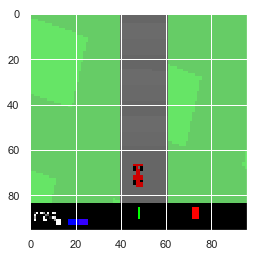

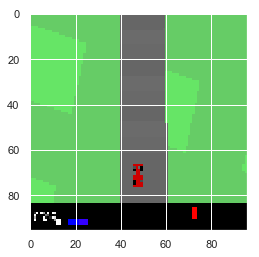

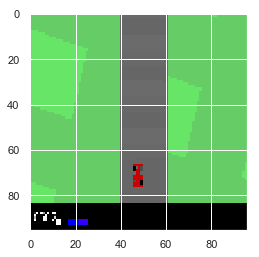

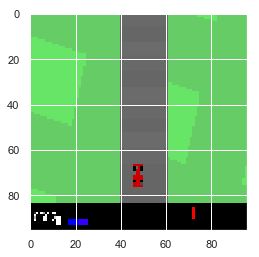

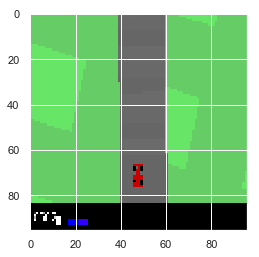

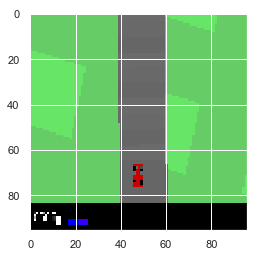

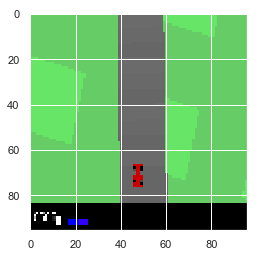

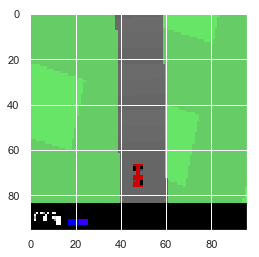

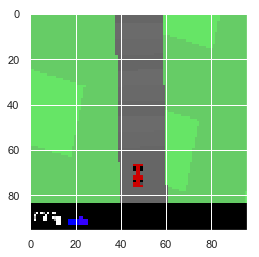

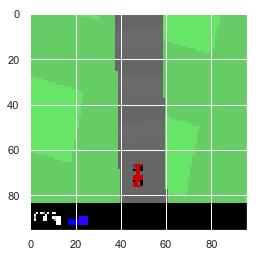

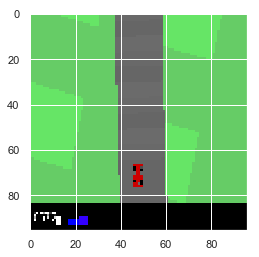

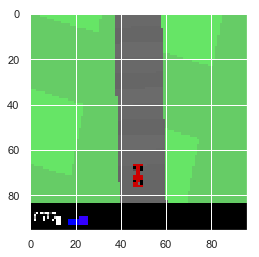

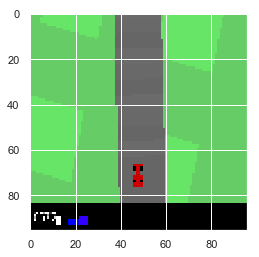

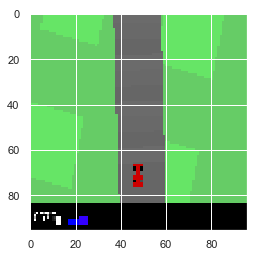

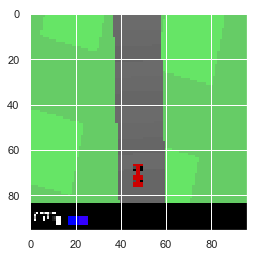

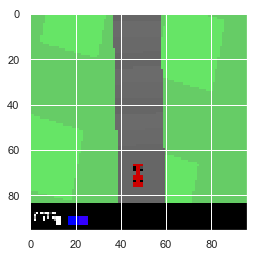

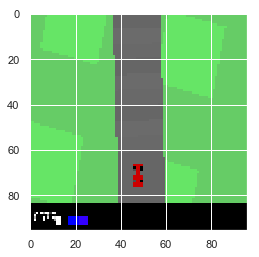

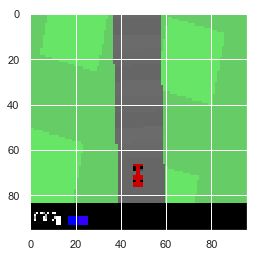

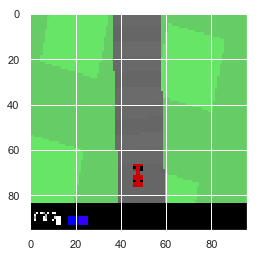

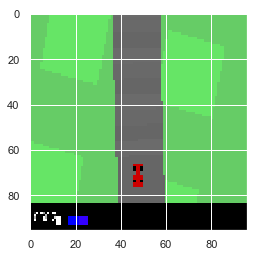

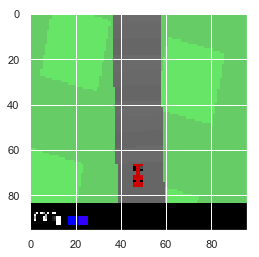

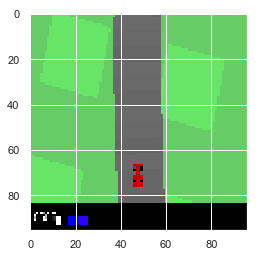

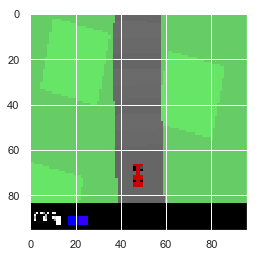

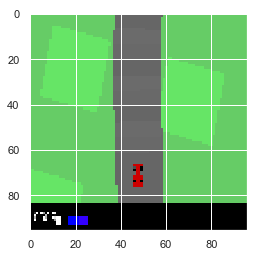

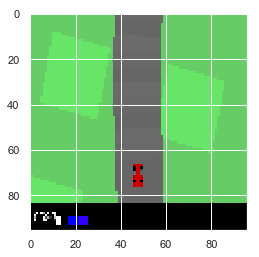

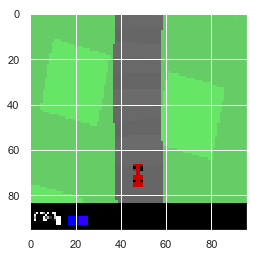

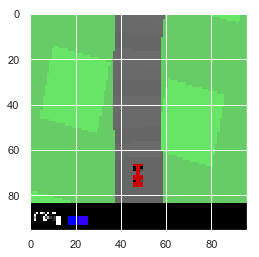

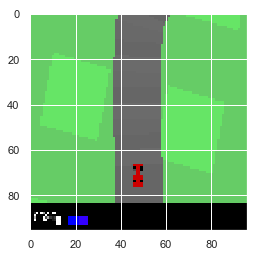

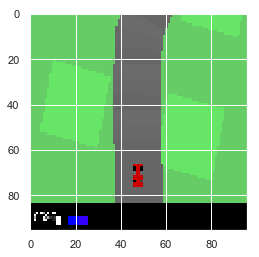

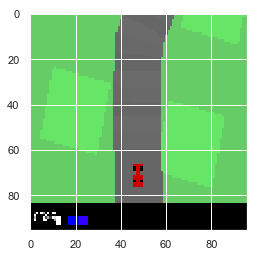

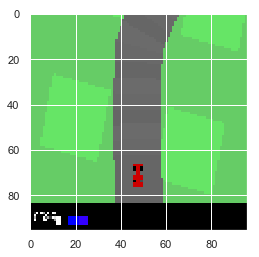

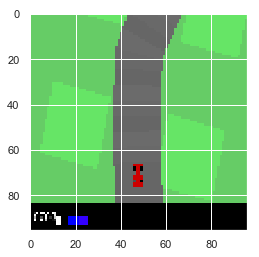

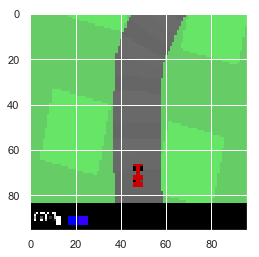

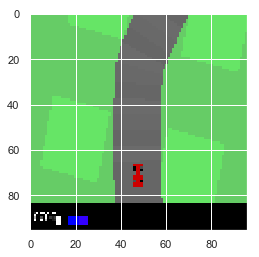

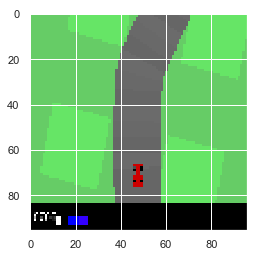

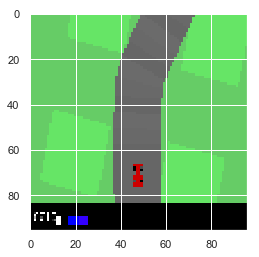

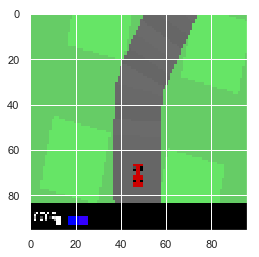

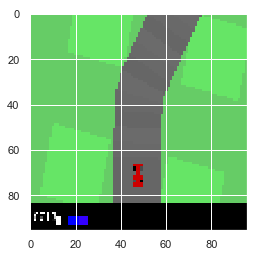

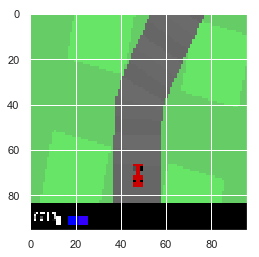

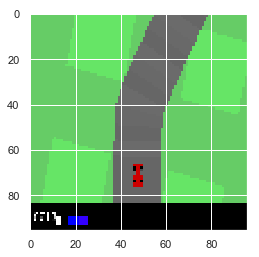

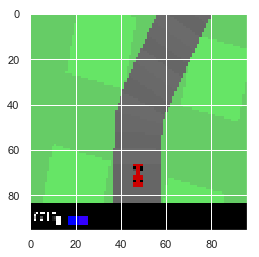

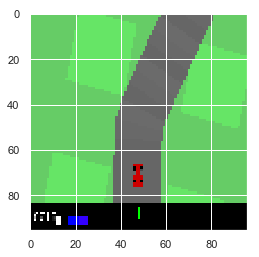

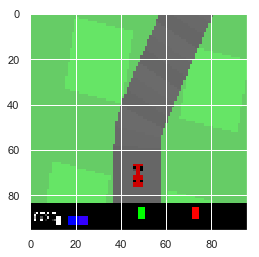

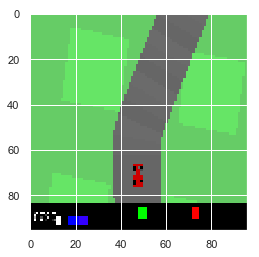

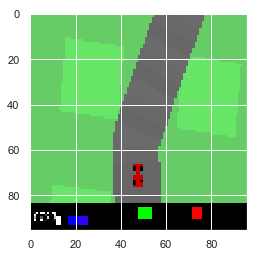

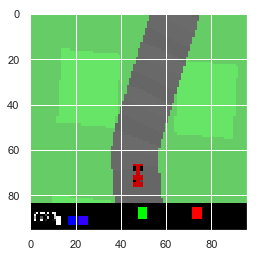

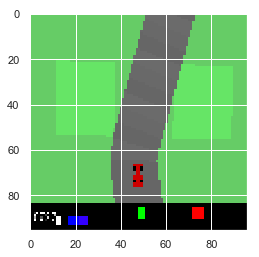

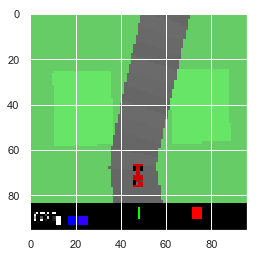

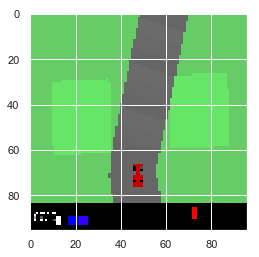

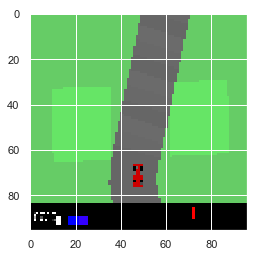

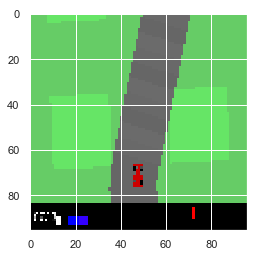

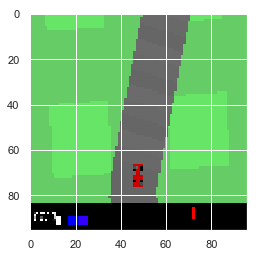

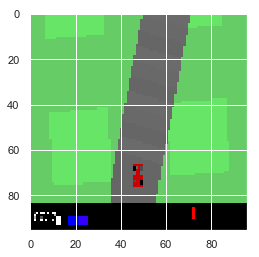

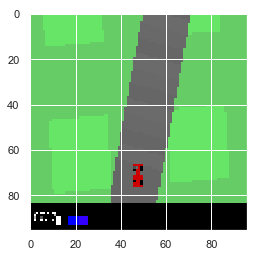

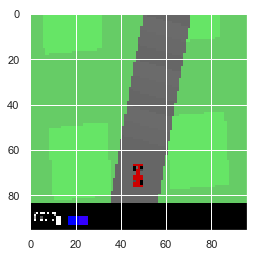

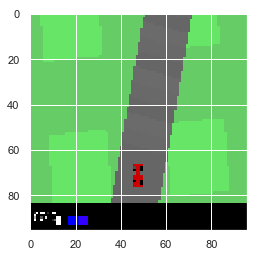

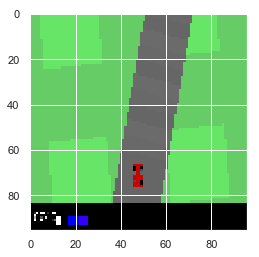

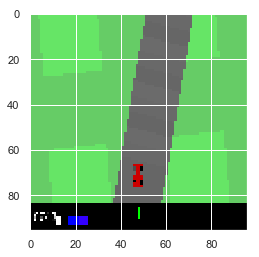

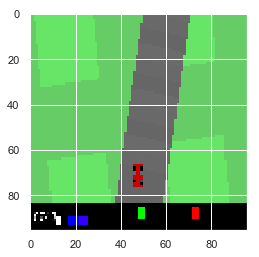

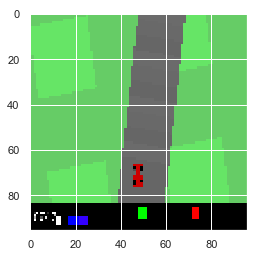

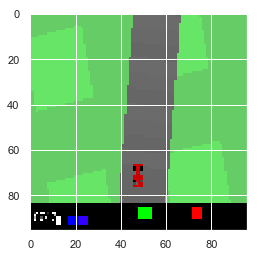

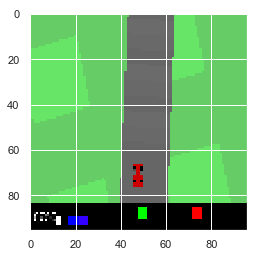

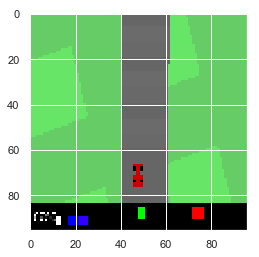

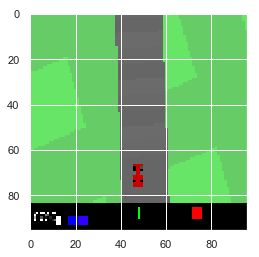

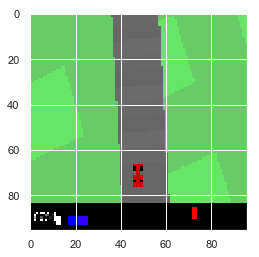

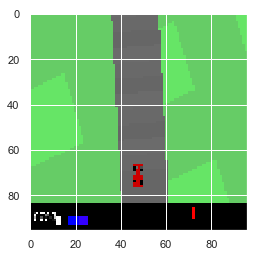

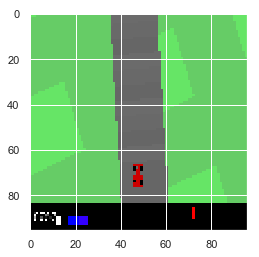

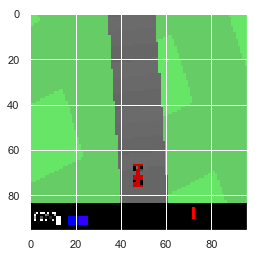

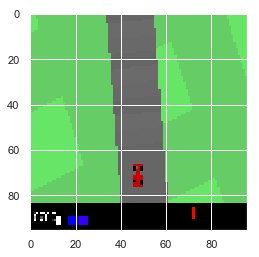

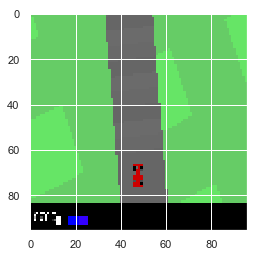

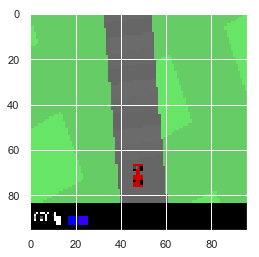

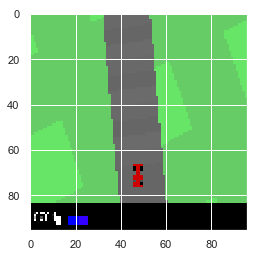

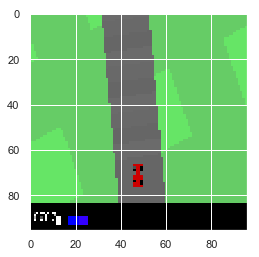

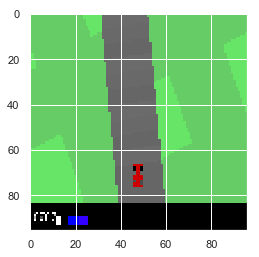

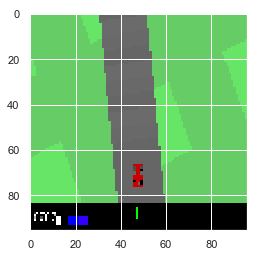

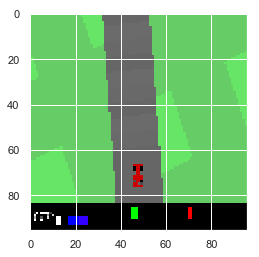

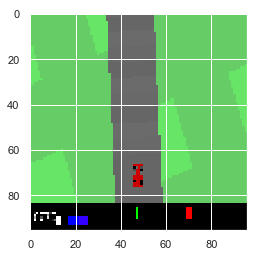

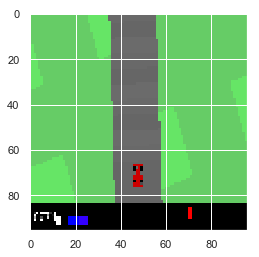

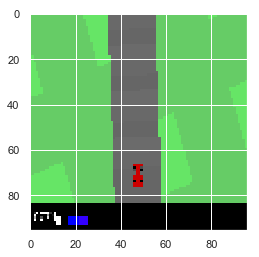

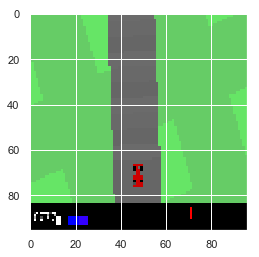

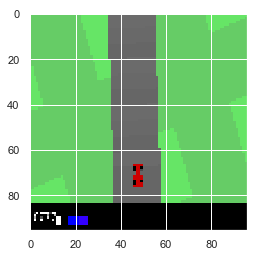

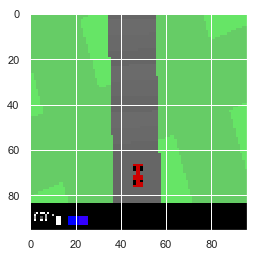

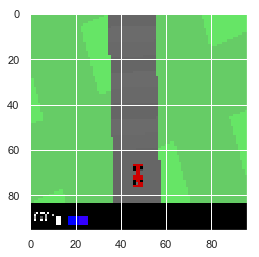

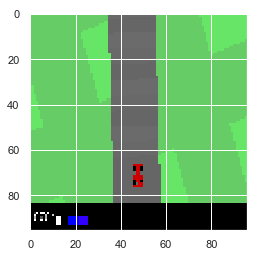

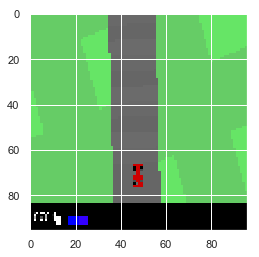

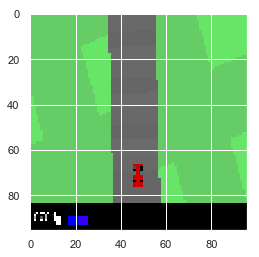

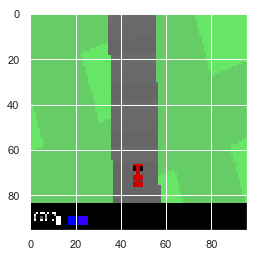

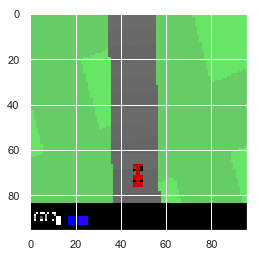

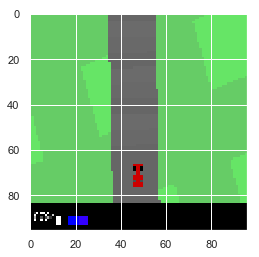

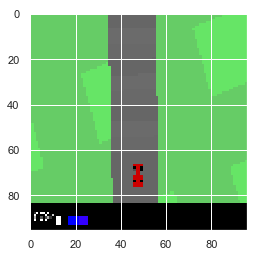

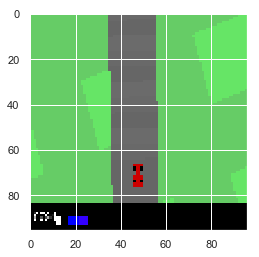

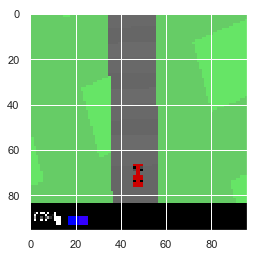

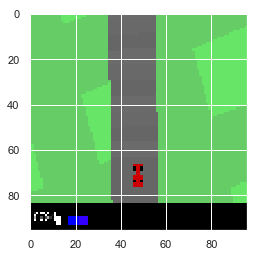

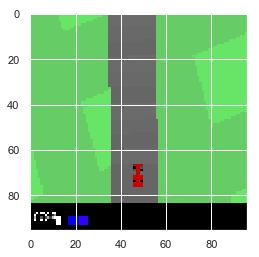

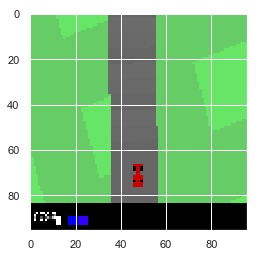

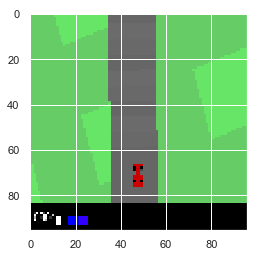

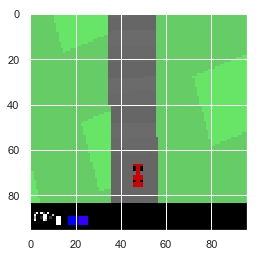

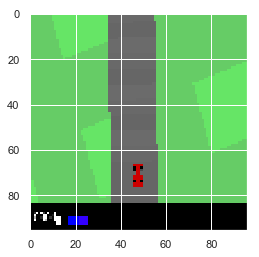

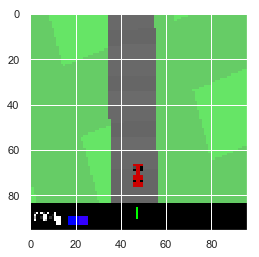

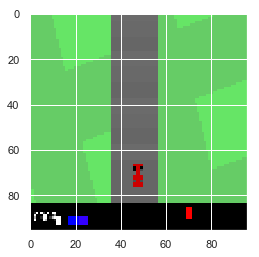

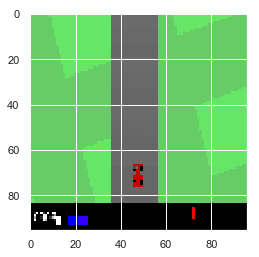

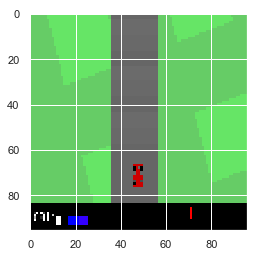

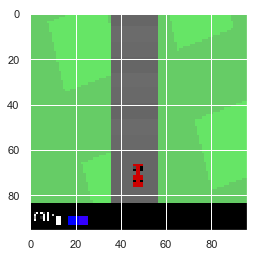

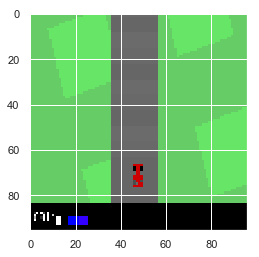

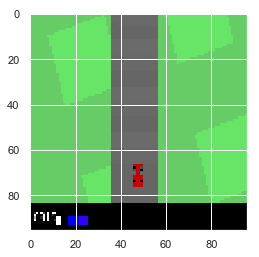

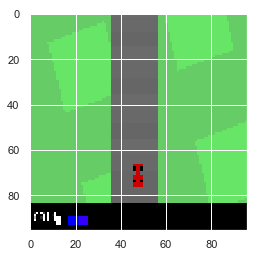

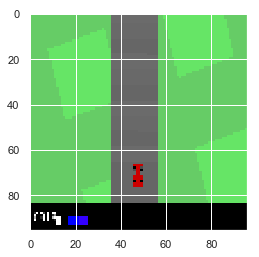

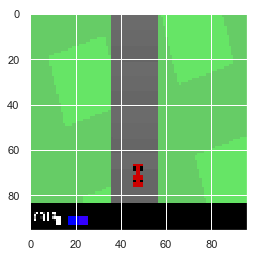

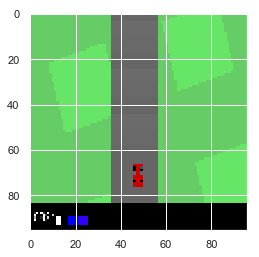

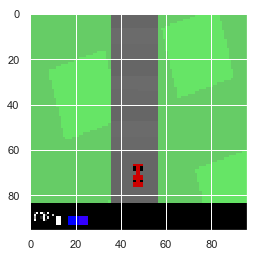

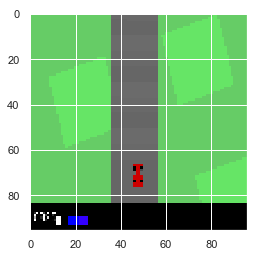

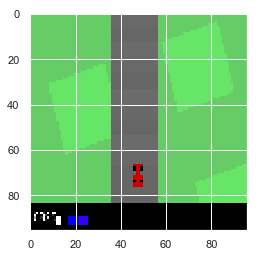

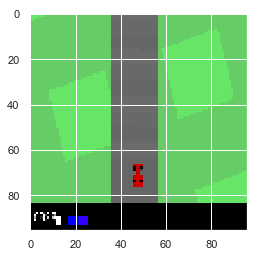

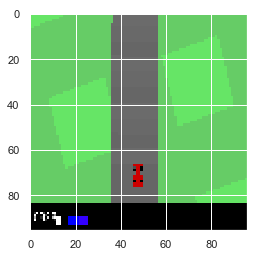

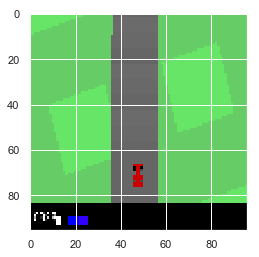

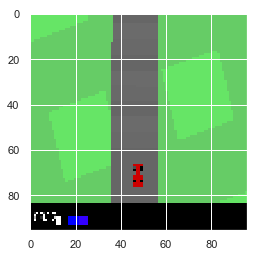

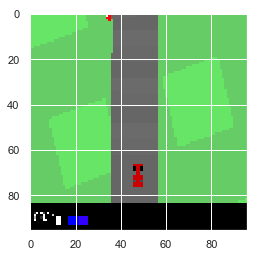

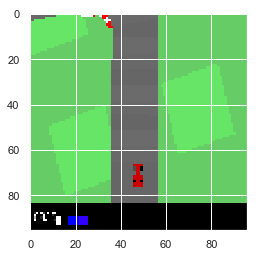

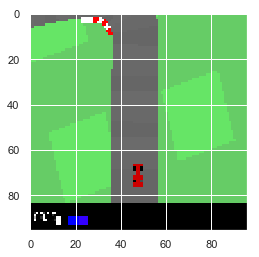

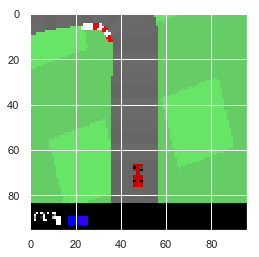

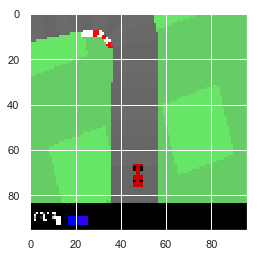

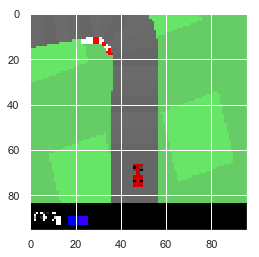

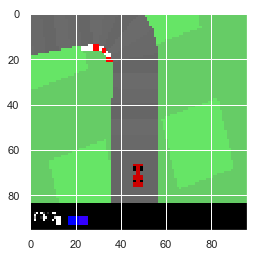

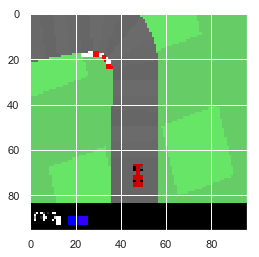

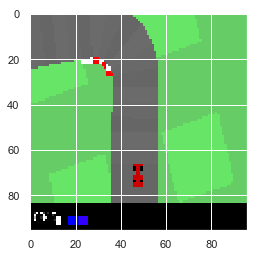

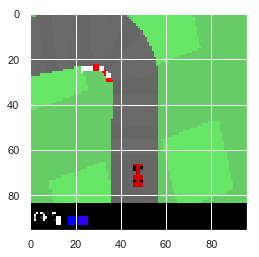

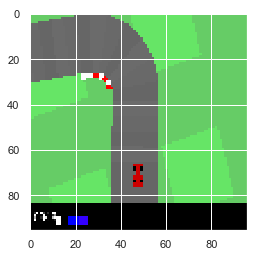

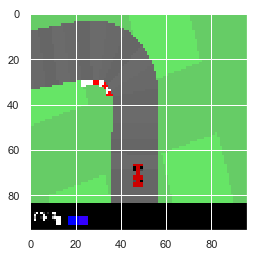

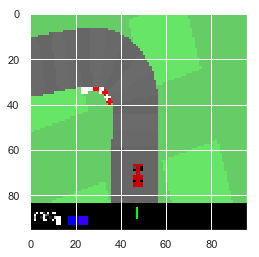

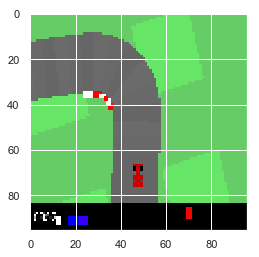

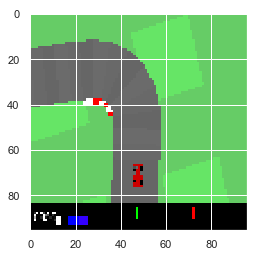

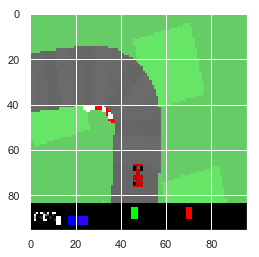

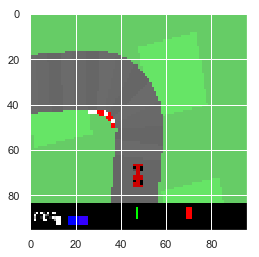

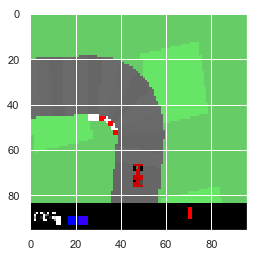

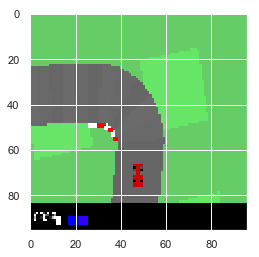

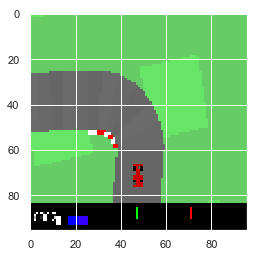

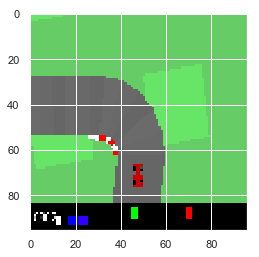

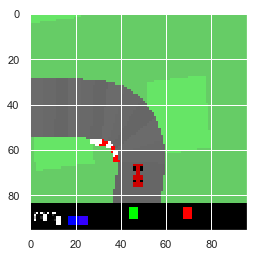

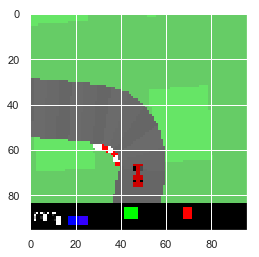

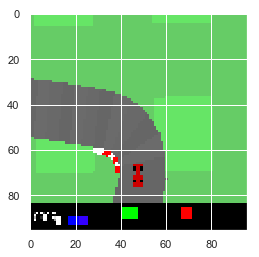

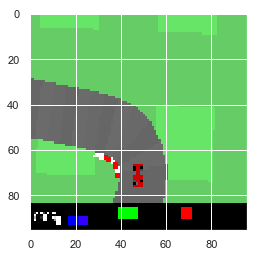

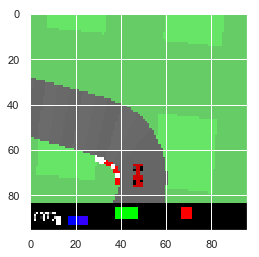

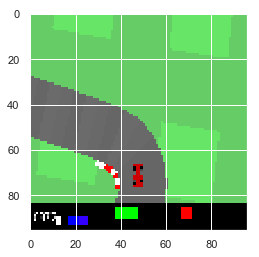

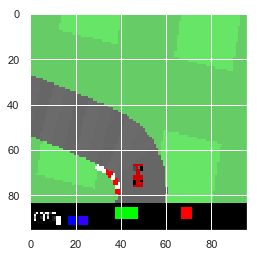

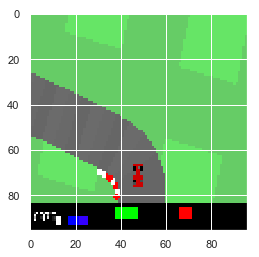

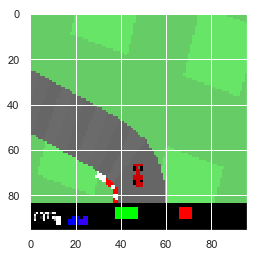

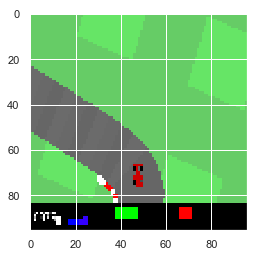

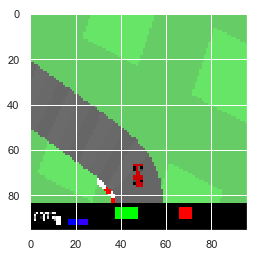

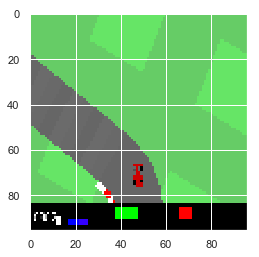

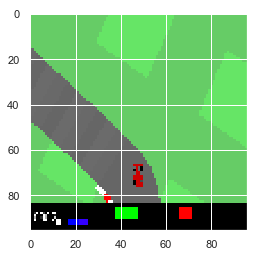

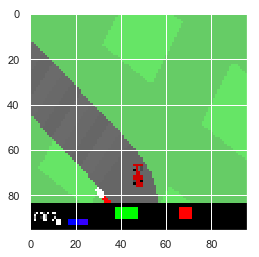

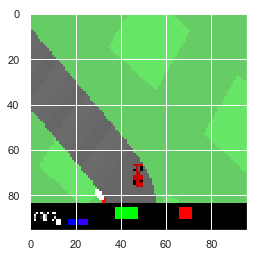

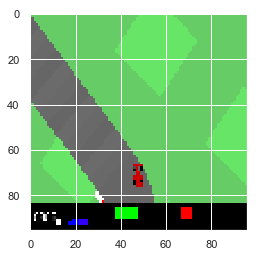

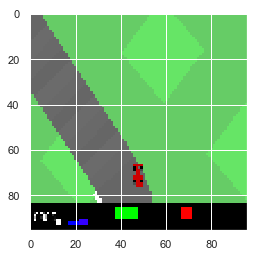

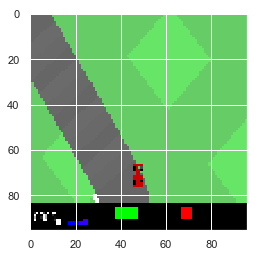

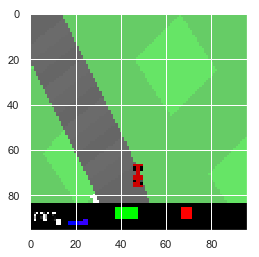

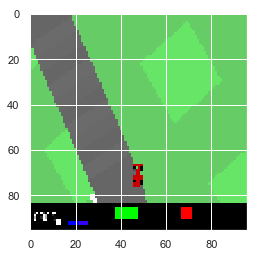

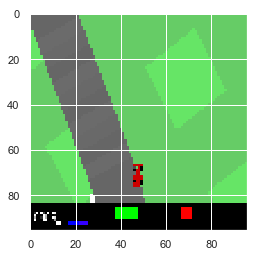

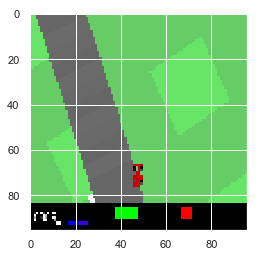

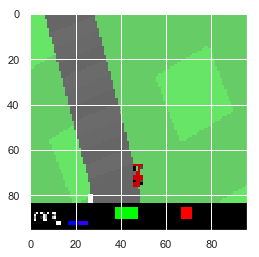

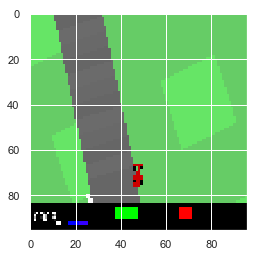

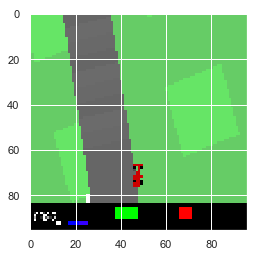

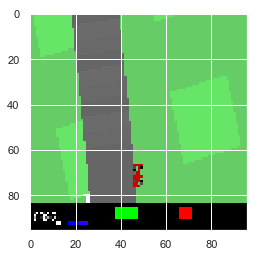

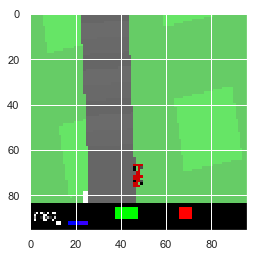

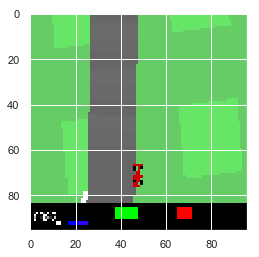

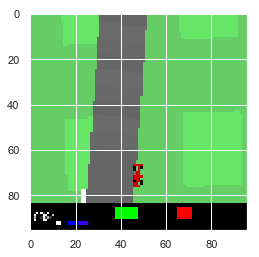

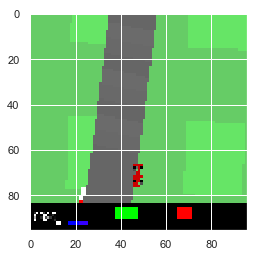

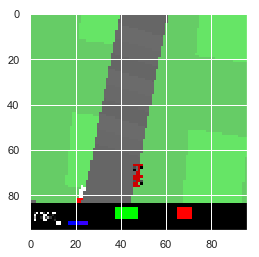

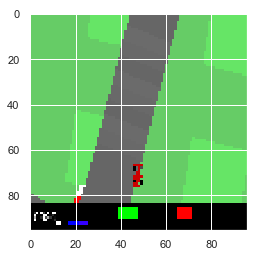

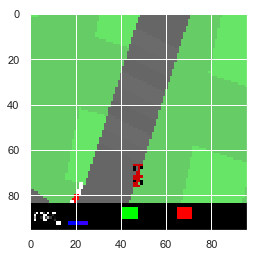

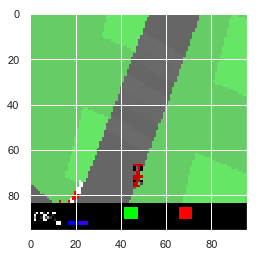

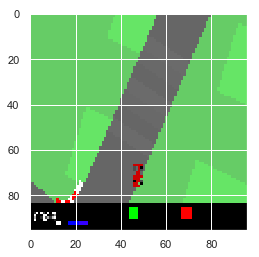

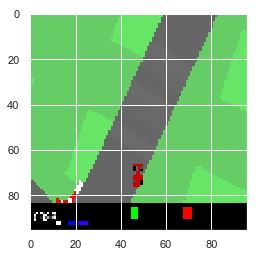

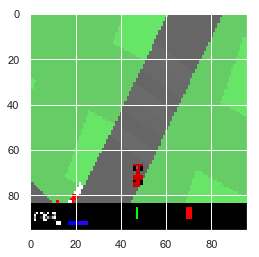

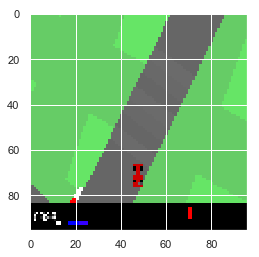

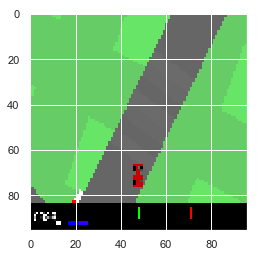

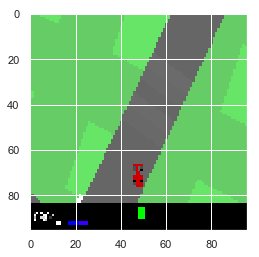

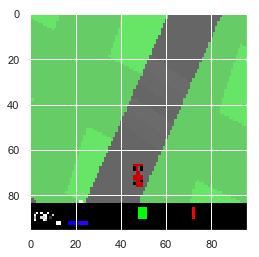

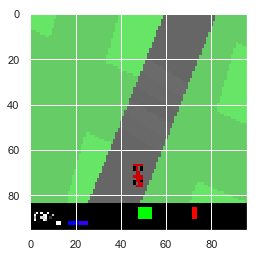

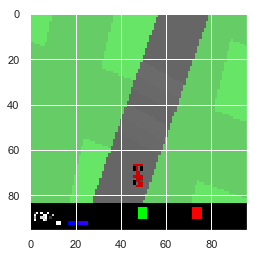

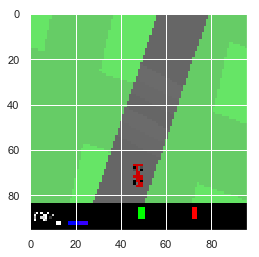

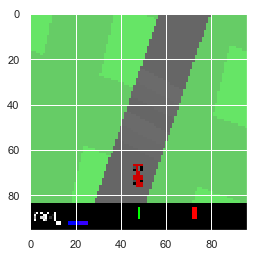

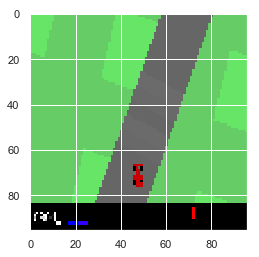

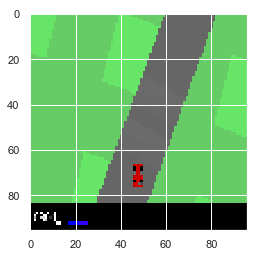

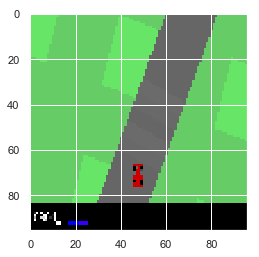

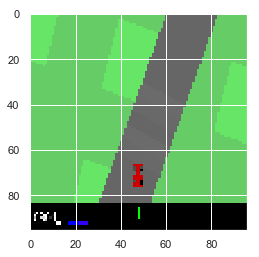

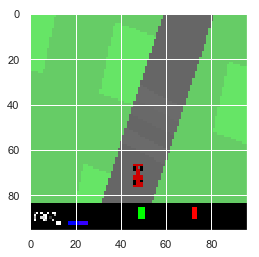

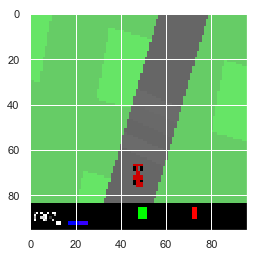

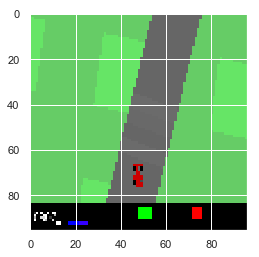

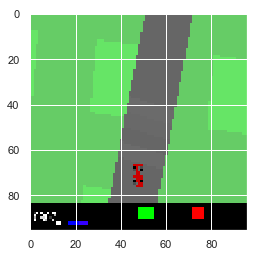

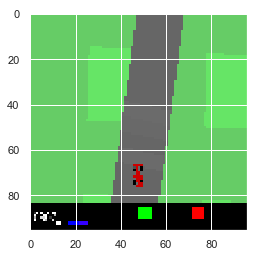

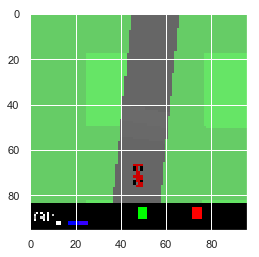

KeyboardInterrupt: 

In [16]:
print(X.shape)
start = X.shape[0] - X_pp.shape[0] + 10-50
for i in range(start-10, start+1000):
    plt.imshow(X[i, :,:, :]*255)
    plt.show()

In [ ]:
def cnn():
    layers = [
        
        mnn.layers.Input(input_shape=[96, 96, 1]), 
        mnn.layers.Conv2d(filters=16, kernel_size=5, stride=4), 
        mnn.layers.ReLU(), 
        mnn.layers.Dropout(drop_probability=0.5),
        mnn.layers.Conv2d(filters=32, kernel_size=3, stride=2), 
        mnn.layers.ReLU(), 
        mnn.layers.Dropout(drop_probability=0.5),
        mnn.layers.Flatten(), 
        mnn.layers.Linear(n_units=128), 
        mnn.layers.Linear(n_units=utils.n_actions), 
    ]
    model = mnn.models.Classifier_From_Layers(layers)
    return Agent(model)